# SINMOD example

* varying advection varying diffusion, can consider isotropy or half-angle
* seperable full flexible model

In [ ]:
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# data = sp.datasets.get_sinmod_training()
# cmin = data['data'].min()
# cmax = data['data'].max()
# for i in range(data['data'].shape[1]):
#     fig, ax = plt.subplots(figsize=(8, 6))
#     im = ax.imshow(data['data'][:,i].reshape(mod.grid.N,mod.grid.M),origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
#     clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
#     ax.set_xlabel('x', fontsize = 15)
#     ax.set_ylabel('y', fontsize = 15)
#     fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
#     fig.savefig("data/data/t%02d.png"%i,dpi = 200, bbox_inches = "tight")
#     fig.set_size_inches(8, 6, forward=True)
#     plt.close()
img = cv2.imread('data/data/t00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./data/data/data.mp4', fourcc, 10, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,data['data'].shape[1]):
    img = cv2.imread('data/data/t%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [ ]:
bc = 1
data = sp.datasets.get_sinmod_training()
mod0 = sp.model(grid = sp.grid(x=data['x'], y=data['y'], extend = 5),
    spde = 'var-whittle-matern', ha = False, bc = bc, anisotropic = True)
x0 = np.load("fits/var_advection_var_diffusion_ani_bc1.npy")
mod = sp.model(grid = sp.grid(x=data['x'], y=data['y'], t = data['t'],extend = 5),
    spde = 'var-advection-var-diffusion', ha = False, bc = bc, anisotropic = True, mod0 = mod0)

mod.mod.setQ(x0)
mod.setModel(mu = data['muB'])#, sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")), useCov = True)
# M, N, P = data['x'].size, data['y'].size, data['t'].size
# idx = np.array([0*M*N + j*M + i for i in range(10) for j in range(10)])
# mod.update(y = np.array([-5]*idx.size),idx  = idx)

In [ ]:
ww = np.ones((mod.grid.M*mod.grid.N,2))
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow((mod.grid.Ae@ww)[:,0].reshape(mod.grid.N+ 2*mod.grid.Ne,mod.grid.M+ 2*mod.grid.Ne),origin='lower' ,cmap = "viridis")
clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

In [ ]:
mod.grid.Ae.shape

In [ ]:
np.diff(mod.grid.x[[0,-1]])[0]

In [ ]:
np.diff(mod.grid.y[[0,-1]])[0]

In [ ]:
test = sp.datasets.get_sinmod_validation()

In [ ]:
test['data'].shape

In [ ]:
mvar = mod.qinv(simple = True)
pos = [5,20,0]
ik = np.zeros(mod.grid.n)
k = mod.grid.getIdx(pos)
ks = mod.grid.getIdx(pos,extend = False)
ik[k] = 1
cov = mod.grid.getS()@mod.Q_fac.solve_A(ik)
corr = cov/np.sqrt(mvar[ks]*mvar)

In [ ]:
tmp = mod.sample(n = 20,seed = 69)
cmax = 1
cmin = 0
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(corr.reshape(mod.grid.T,mod.grid.N,mod.grid.M)[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("video/corrt%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()
img = cv2.imread('video/corrt00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video/videoADcorr.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('video/corrt%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [ ]:
mvar =  mvar.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
cmax = mvar.max()
cmin = mvar.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(mvar[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("video/mvart%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()
img = cv2.imread('video/mvart00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video/videoADmvar.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('video/mvart%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [ ]:
tmp = mod.sample(n = 20,seed = 69)
ver = 5
cmax = tmp[:,ver].max()
cmin = tmp[:,ver].min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(tmp[:,ver].reshape(mod.grid.T,mod.grid.N,mod.grid.M)[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("video/t%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()
img = cv2.imread('video/t00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video/videoAD.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('video/t%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [ ]:
bc = 1
data = sp.datasets.get_sinmod_training()
mod = sp.model(grid = sp.grid(x=data['x'], y=data['y'], t = data['t'],extend = 5),
    spde = 'seperable-spatial-temporal', ha = False, bc = bc, anisotropic = True)
x0 = np.load("fits/seperable_spatial_temporal_ani_bc1.npy")
mod.mod.setQ(x0)
mod.setModel(mu = data['muB'])

In [ ]:
mvar = mod.qinv(simple = True)
pos = [5,20,0]
ik = np.zeros(mod.grid.n)
k = mod.grid.getIdx(pos)
ks = mod.grid.getIdx(pos,extend = False)
ik[k] = 1
cov = mod.grid.getS()@mod.Q_fac.solve_A(ik)
corr = cov/np.sqrt(mvar[ks]*mvar)

In [ ]:
tmp = mod.sample(n = 20,seed = 69)
cmax = 1
cmin = 0
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(corr.reshape(mod.grid.T,mod.grid.N,mod.grid.M)[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("video/corrSt%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()
img = cv2.imread('video/corrSt00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video/videoScorr.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('video/corrSt%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [ ]:
tmp = mod.sample(n = 20,seed = 69)
ver = 5
cmax = tmp[:,ver].max()
cmin = tmp[:,ver].min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(tmp[:,ver].reshape(mod.grid.T,mod.grid.N,mod.grid.M)[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("video/St%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()
img = cv2.imread('video/St00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video/videoS.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('video/St%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

## Visualization of field initial code

In [ ]:
# want to make this similar to my 3D plotting in GMRFpy
# using plotly, only now time downwards
import numpy as np
import spdepy as sp
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.io as pio

pio.orca.shutdown_server()
M = mod.grid.M
N = mod.grid.N
T = mod.grid.T
sx = mod.grid.sx
sy = mod.grid.sy
ts = mod.grid.t
value = mvar.reshape(T,-1)
cmin = value.min()
cmax = value.max()
# cmin = 0
# cmax = 1
# value = corr.reshape(T,-1)
cs = "viridis"
xdif = mod.grid.A/4
ydif = mod.grid.B/4
xarrow = np.array([sx.max()-.497*xdif,sx.max()-.142*xdif,sx.max()-.142*xdif,sx.max()-.142*xdif,sx.max()-.355*xdif])
yarrow = np.array([sy.max()-.520*ydif,sy.max()-.164*ydif,sy.max()-.378*ydif,sy.max()-.164*ydif,sy.max() -.164*ydif])
vZ = np.array([0,0.705,1.67,3])
fig = go.Figure(data=[go.Isosurface(z=-0.5*np.ones(N*M), x=sx, y=sy,
                                    value=value[9,:],surface_count=1,
                                    isomin = cmin,isomax = cmax,colorscale=cs,
                                    colorbar=dict(thickness=20,lenmode = "fraction", 
                                                  len = 0.8, ticklen=10,
                                                  tickfont=dict(size=25, color='black')))])
for i in range(1,4):
    fig.add_trace(go.Isosurface(z=(-0.5 - vZ[i])*np.ones(N*M), x=sx+xdif*vZ[i], y=sy-ydif*vZ[i],
                                surface_count=1, value=value[9-3*i,:], isomin = cmin,
                                isomax =cmax,colorscale=cs,showscale = False))

if cmin == 0 and cmax == 1:
    fig.add_trace(go.Scatter3d(mode = "markers", x=[sx[pos[1]*M + pos[0]]+xdif*3],
                               y = [sy[pos[1]*M + pos[0]]-ydif*3], 
                               z=[-3.5], marker_color="black",marker_size=7,showlegend = False))

for j in range(4):
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, 0*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[0*M + 0, 0*M + (M-1)]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, (N-1)*M + 0]]+xdif*vZ[j],
                               y=[0,0]+sy[[0*M + 0, (N-1)*M + 0]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[(N-1)*M + 0, (N-1)*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[(N-1)*M + 0, (N-1)*M + (M-1)]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + (M-1), (N-1)*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[0*M + (M-1), (N-1)*M + (M-1)]]+-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))

# axis 
fig.add_trace(go.Scatter3d(x=[0,0.213*xdif,0.114*xdif,0.213*xdif,0.114*xdif]+sx[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]+xdif*3, 
                            y=[0,0,0.099*ydif,0,-0.099*ydif]+sy[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
                            line = dict(color='black', width = 5),showlegend=False))
fig.add_trace(go.Scatter3d(x=[0,0,0.099*xdif,0,-0.099*xdif]+sx[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+xdif*3, 
                            y=[0,0.213*ydif,0.114*ydif,0.213*ydif,0.114*ydif]+sy[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
                            line = dict(color='black',width = 5),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]+xdif*3, 
                            y=sy[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
                            marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+xdif*3,
                           y=sy[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3,
                           z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
                           marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[0*M + 2*(M-1)//4]]+xdif*3, 
                            y=sy[[0*M + 2*(M-1)//4]]-ydif*3, 
                            z=np.array([-0.5])-3, mode='text',textposition="bottom left",
                            text = ["x"],textfont=dict(size=18,color="black"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[2*(N-1)//4*M + (M-1)]]+xdif*3,
                           y=sy[[2*(N-1)//4*M + (M-1)]]+-ydif*3,
                           z=np.array([-0.5])-3, mode='text', textposition="bottom right",
                           text = ["y"],textfont=dict(size=18,color="black"),showlegend=False))
# lines
fig.add_trace(go.Scatter3d(
    x = np.array([xdif*3,-0.4*xdif,-0.3*xdif+xdif*0.099, -0.4*xdif,-0.3*xdif-xdif*0.099])+sx[0],
    y = np.array([-ydif*3,0.4*ydif,0.3*ydif + ydif*0.099, 0.4*ydif, 0.3*ydif-ydif*0.099])+sy[0],
    z = np.array([-3.5,-0.1,-0.2,-0.1,-0.2]),
    line=dict(color='black',width=7),
    mode='lines',
    showlegend=False))

# marker
fig.add_trace(go.Scatter3d(
    x = np.array([xdif]*4)*np.flip(vZ) + sx[0],
    y = np.array([-ydif]*4)*np.flip(vZ) + sy[0],
    z = np.array([-.5]*4) - np.flip(vZ),
    mode='markers',
    marker=dict(size=8, color="black",symbol = "cross"),
    showlegend=False))

# text
fig.add_trace(go.Scatter3d(
    x = np.array([xdif]*4)*np.flip(vZ) + sx[0],
    y = np.array([-ydif]*4)*np.flip(vZ) + sy[0],
    z = np.array([-.5]*4) - np.flip(vZ),
    mode='text',
    text=["%d"%ts[i] for i in range(0,10,3)],
    textfont=dict(size=18,color="black"),
    textposition="middle left",
    showlegend=False))
    
fig.add_trace(go.Scatter3d(
    x = np.array([-0.5*xdif])+sx[0],
    y = np.array([0.5*ydif])+sy[0],
    z = np.array([0.0]),
    mode='text',
    text=["Time (min)"],
    textfont=dict(size=15,color="black"),
    textposition="middle center",
    showlegend=False))
    
# used for centering
fig.add_trace(go.Scatter3d(
    x = np.array([-0.5*xdif])+sx[-1],
    y = np.array([0.5*ydif])+sy[-1],
    z = [0.0],
    mode='text',
    text=[""],
    textfont=dict(size=15,color="black"),
    textposition="middle center",
    showlegend=False))
######

fig.add_trace(go.Scatter3d(
    x=xarrow, 
    y=yarrow,
    z=np.array([0,0,0,0,0])-0.5,
    line=dict(color='white',width=12),
    mode='lines+text',
    text=["","", "N","",""],
    showlegend=False,
    textposition="top center",
    textfont=dict(size=25,color="black")))

camera = dict(eye=dict(x=1.092, y=-1.12, z=.83), center=dict(x=0.13, y=-0.18, z=-0.042))
fig.update_scenes(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False, camera = camera)
fig.update_layout(autosize=False, width=650, height=1000, scene_aspectratio=dict(x=1, y=1, z=1.0))

fig.write_html("test.html", auto_open = True)
fig.write_image("../../../spat_temp_paper/figures/app_vAvD_mvar.png",engine="orca",scale=1)



## Sample path generation for test metric application

In [ ]:
def plot_path(path):
    data = sp.datasets.get_sinmod_training()
    M, N, P = data['x'].size, data['y'].size, data['t'].size
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(data['x'][path[:,0]], data['y'][path[:,1]], 'k', lw = 1)
    if path.shape[0] < 5:
        for i in range(path.shape[0]):
            ax.annotate("%d"%(1+i), (data['x'][path[i,0]], data['y'][path[i,1]]), fontsize = 15)
    ax.pcolormesh(data['x'], data['y'], data['mu'].reshape(N,M), cmap = 'viridis', shading = 'auto')
    return fig, ax

In [ ]:
data = sp.datasets.get_sinmod_training()
M = mod.grid.M
N = mod.grid.N
fig, ax = plt.subplots(figsize=(8, 6))
ax.pcolormesh(data['x'], data['y'], data['mu'].reshape(mod.grid.N,mod.grid.M), cmap = 'viridis', shading = 'auto')
idx = np.load("data/paths/%03d.npy"%6)
ts = idx // (M * N)
ys = (idx // M) % N
xs = idx % M
M, N, P = data['x'].size, data['y'].size, data['t'].size
ax.plot(data['x'][xs], data['y'][ys], 'k', lw = 1, alpha = 1)
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
fig.savefig('../../../spat_temp_paper/figures/path1.png',dpi = 200, bbox_inches = "tight")

In [ ]:
data = sp.datasets.get_sinmod_training()
M = mod.grid.M
N = mod.grid.N
fig, ax = plt.subplots(figsize=(8, 6))
ax.pcolormesh(data['x'], data['y'], data['mu'].reshape(mod.grid.N,mod.grid.M), cmap = 'viridis', shading = 'auto')
for i in range(200):
    idx = np.load("data/paths/%03d.npy"%i)
    ts = idx // (M * N)
    ys = (idx // M) % N
    xs = idx % M
    M, N, P = data['x'].size, data['y'].size, data['t'].size
    ax.plot(data['x'][xs], data['y'][ys], 'k', lw = 1, alpha = 0.2)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
fig.savefig('../../../spat_temp_paper/figures/paths.png',dpi = 200, bbox_inches = "tight")

## Make evaluation figures 

In [ ]:
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt

res_vAvD = np.load("fits/pred_var-advection-var-diffusion-2D-bc1.npy")
res_C = np.load("fits/pred_seperable-spatial-temporal-ani-2D-bc1.npy")
val = sp.datasets.get_sinmod_validation()

mu_vAvD = res_vAvD.mean(axis = (0))
mu_vAvD[:,:,0] = np.sqrt(mu_vAvD[:,:,0])
sd_vAvD = (mu_vAvD).std(axis = (1))
mu_vAvD = mu_vAvD.mean(axis = (1))
mu_C = res_C.mean(axis = (0))
mu_C[:,:,0] = np.sqrt(mu_C[:,:,0])
sd_C = (mu_C).std(axis = (1))
mu_C = mu_C.mean(axis = (1))

low_vAvD = np.max(np.stack([mu_vAvD - sd_vAvD, np.zeros(mu_vAvD.shape)], axis = 2), axis = 2)
low_C = np.max(np.stack([mu_C - sd_C, np.zeros(mu_C.shape)], axis = 2), axis = 2)
fig, ax = plt.subplots(figsize=(12,8),nrows = 2)
ns = 72 
stm = np.arange(ns).astype("int32")
ax[0].plot(stm,mu_C[:,0][:ns], label = 'NStat-Sep')
ax[1].plot(stm,mu_C[:,1][:ns], label = 'NStat-Sep')

ax[0].fill_between(stm, low_C[:,0][:ns], (mu_C[:,0] + sd_C[:,0])[:ns], alpha = 0.2)
ax[1].fill_between(stm, low_C[:,1][:ns], (mu_C[:,1] + sd_C[:,1])[:ns], alpha = 0.2)
ax[0].plot(stm,mu_vAvD[:,0][:ns], label = 'NStat-AD')
ax[1].plot(stm,mu_vAvD[:,1][:ns], label = 'NStat-AD')
ax[0].fill_between(stm, low_vAvD[:,0][:ns], (mu_vAvD[:,0] + sd_vAvD[:,0])[:ns], alpha = 0.2)
ax[1].fill_between(stm, low_vAvD[:,1][:ns], (mu_vAvD[:,1] + sd_vAvD[:,1])[:ns], alpha = 0.2)
ax[0].set_xticks(stm[::2])
ax[1].set_xticks(stm[::2])

ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.28),
          fancybox=True, shadow=True, ncol=2)
ax[1].set_xlabel('timeseries id')
ax[0].set_ylabel('RMSE')
ax[1].set_ylabel('CRPS')

fig.savefig("../../../spat_temp_paper/figures/app_eval.png",bbox_inches='tight',dpi = 200)

In [1]:
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
res_vAvD = np.load("fits/pred_var-advection-var-diffusion-2D-bc1.npy")
res_C = np.load("fits/pred_seperable-spatial-temporal-ani-2D-bc1.npy")
val = sp.datasets.get_sinmod_validation()

In [3]:
mu_vAvD = res_vAvD.mean(axis = (0))
mu_vAvD[:,:,0] = np.sqrt(mu_vAvD[:,:,0])
sd_vAvD = (mu_vAvD).std(axis = (1))
mu_vAvD = mu_vAvD.mean(axis = (1))
mu_C = res_C.mean(axis = (0))
mu_C[:,:,0] = np.sqrt(mu_C[:,:,0])
sd_C = (mu_C).std(axis = (1))
mu_C = mu_C.mean(axis = (1))

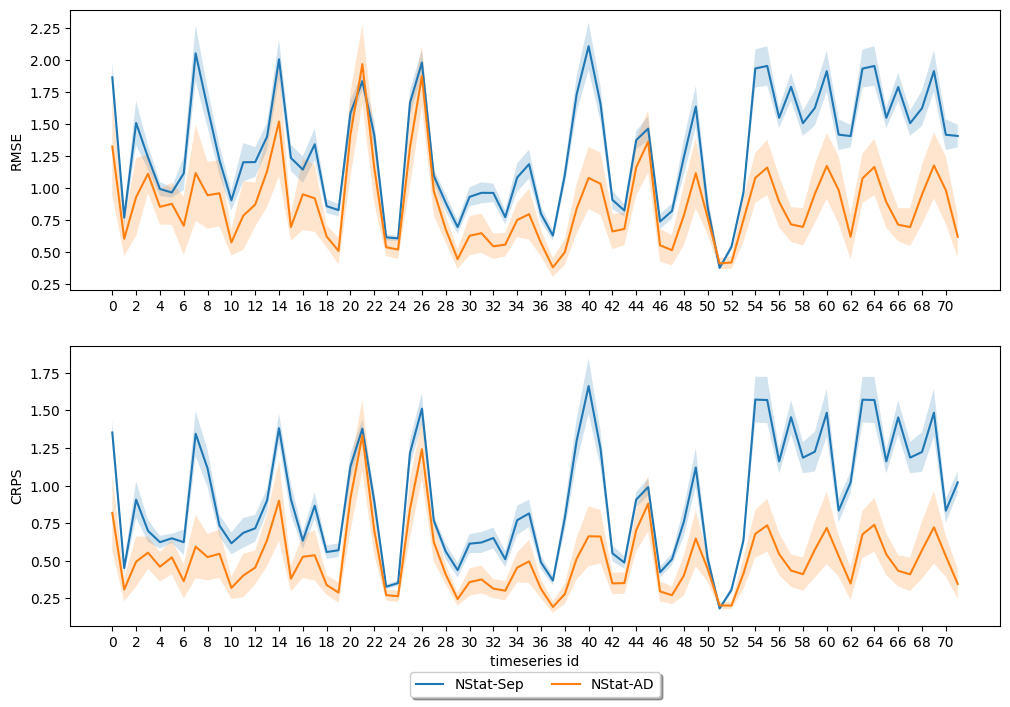

In [5]:
low_vAvD = np.max(np.stack([mu_vAvD - sd_vAvD, np.zeros(mu_vAvD.shape)], axis = 2), axis = 2)
low_C = np.max(np.stack([mu_C - sd_C, np.zeros(mu_C.shape)], axis = 2), axis = 2)
fig, ax = plt.subplots(figsize=(12,8),nrows = 2)
ns = 72 
stm = np.arange(ns).astype("int32")
ax[0].plot(stm,mu_C[:,0][:ns], label = 'NStat-Sep')
ax[1].plot(stm,mu_C[:,1][:ns], label = 'NStat-Sep')

ax[0].fill_between(stm, low_C[:,0][:ns], (mu_C[:,0] + sd_C[:,0])[:ns], alpha = 0.2)
ax[1].fill_between(stm, low_C[:,1][:ns], (mu_C[:,1] + sd_C[:,1])[:ns], alpha = 0.2)
ax[0].plot(stm,mu_vAvD[:,0][:ns], label = 'NStat-AD')
ax[1].plot(stm,mu_vAvD[:,1][:ns], label = 'NStat-AD')
ax[0].fill_between(stm, low_vAvD[:,0][:ns], (mu_vAvD[:,0] + sd_vAvD[:,0])[:ns], alpha = 0.2)
ax[1].fill_between(stm, low_vAvD[:,1][:ns], (mu_vAvD[:,1] + sd_vAvD[:,1])[:ns], alpha = 0.2)
ax[0].set_xticks(stm[::2])
ax[1].set_xticks(stm[::2])

ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.28),
          fancybox=True, shadow=True, ncol=2)
ax[1].set_xlabel('timeseries id')
ax[0].set_ylabel('RMSE')
ax[1].set_ylabel('CRPS')

fig.savefig("../../../spat_temp_paper/figures/app_eval.png",bbox_inches='tight',dpi = 200)

---
## Make SINMOD figure
---

In [ ]:
# want to make this similar to my 3D plotting in GMRFpy
# using plotly, only now time downwards
import numpy as np
import spdepy as sp
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.io as pio

pio.orca.shutdown_server()
M = mod.grid.M
N = mod.grid.N
T = mod.grid.T
sx = mod.grid.sx
sy = mod.grid.sy
ts = mod.grid.t
vers = 7
value = data['data'][:,(vers-1)*mod.grid.T:vers*mod.grid.T].transpose()
cmin = data['data'].min()
cmax = data['data'].max()
cs = "viridis"
xdif = mod.grid.A/4
ydif = mod.grid.B/4
xarrow = np.array([sx.max()-.497*xdif,sx.max()-.142*xdif,sx.max()-.142*xdif,sx.max()-.142*xdif,sx.max()-.355*xdif])
yarrow = np.array([sy.max()-.520*ydif,sy.max()-.164*ydif,sy.max()-.378*ydif,sy.max()-.164*ydif,sy.max() -.164*ydif])
vZ = np.array([0,0.705,1.67,3])
fig = go.Figure(data=[go.Isosurface(z=-0.5*np.ones(N*M), x=sx, y=sy,
                                    value=value[9,:],surface_count=1,
                                    isomin = cmin,isomax = cmax,colorscale=cs,
                                    colorbar=dict(thickness=20,lenmode = "fraction", 
                                                  len = 0.8, ticklen=10,title = "psu",
                                                  tickfont=dict(size=25, color='black')))])
for i in range(1,4):
    fig.add_trace(go.Isosurface(z=(-0.5 - vZ[i])*np.ones(N*M), x=sx+xdif*vZ[i], y=sy-ydif*vZ[i],
                                surface_count=1, value=value[9-3*i,:], isomin = cmin,
                                isomax =cmax,colorscale=cs,showscale = False))

if cmin == 0 and cmax == 1:
    fig.add_trace(go.Scatter3d(mode = "markers", x=[sx[pos[1]*M + pos[0]]+xdif*3],
                               y = [sy[pos[1]*M + pos[0]]-ydif*3], 
                               z=[-3.5], marker_color="black",marker_size=7,showlegend = False))

for j in range(4):
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, 0*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[0*M + 0, 0*M + (M-1)]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, (N-1)*M + 0]]+xdif*vZ[j],
                               y=[0,0]+sy[[0*M + 0, (N-1)*M + 0]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[(N-1)*M + 0, (N-1)*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[(N-1)*M + 0, (N-1)*M + (M-1)]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + (M-1), (N-1)*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[0*M + (M-1), (N-1)*M + (M-1)]]+-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))

# axis 
fig.add_trace(go.Scatter3d(x=[0,0.213*xdif,0.114*xdif,0.213*xdif,0.114*xdif]+sx[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]+xdif*3, 
                            y=[0,0,0.099*ydif,0,-0.099*ydif]+sy[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
                            line = dict(color='black', width = 5),showlegend=False))
fig.add_trace(go.Scatter3d(x=[0,0,0.099*xdif,0,-0.099*xdif]+sx[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+xdif*3, 
                            y=[0,0.213*ydif,0.114*ydif,0.213*ydif,0.114*ydif]+sy[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
                            line = dict(color='black',width = 5),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]+xdif*3, 
                            y=sy[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
                            marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+xdif*3,
                           y=sy[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3,
                           z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
                           marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[0*M + 2*(M-1)//4]]+xdif*3, 
                            y=sy[[0*M + 2*(M-1)//4]]-ydif*3, 
                            z=np.array([-0.5])-3, mode='text',textposition="bottom left",
                            text = ["x"],textfont=dict(size=18,color="black"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[2*(N-1)//4*M + (M-1)]]+xdif*3,
                           y=sy[[2*(N-1)//4*M + (M-1)]]+-ydif*3,
                           z=np.array([-0.5])-3, mode='text', textposition="bottom right",
                           text = ["y"],textfont=dict(size=18,color="black"),showlegend=False))
# lines
fig.add_trace(go.Scatter3d(
    x = np.array([xdif*3,-0.4*xdif,-0.3*xdif+xdif*0.099, -0.4*xdif,-0.3*xdif-xdif*0.099])+sx[0],
    y = np.array([-ydif*3,0.4*ydif,0.3*ydif + ydif*0.099, 0.4*ydif, 0.3*ydif-ydif*0.099])+sy[0],
    z = np.array([-3.5,-0.1,-0.2,-0.1,-0.2]),
    line=dict(color='black',width=7),
    mode='lines',
    showlegend=False))

# marker
fig.add_trace(go.Scatter3d(
    x = np.array([xdif]*4)*np.flip(vZ) + sx[0],
    y = np.array([-ydif]*4)*np.flip(vZ) + sy[0],
    z = np.array([-.5]*4) - np.flip(vZ),
    mode='markers',
    marker=dict(size=8, color="black",symbol = "cross"),
    showlegend=False))

# text
fig.add_trace(go.Scatter3d(
    x = np.array([xdif]*4)*np.flip(vZ) + sx[0],
    y = np.array([-ydif]*4)*np.flip(vZ) + sy[0],
    z = np.array([-.5]*4) - np.flip(vZ),
    mode='text',
    text=["%d"%ts[i] for i in range(0,10,3)],
    textfont=dict(size=18,color="black"),
    textposition="middle left",
    showlegend=False))
    
fig.add_trace(go.Scatter3d(
    x = np.array([-0.5*xdif])+sx[0],
    y = np.array([0.5*ydif])+sy[0],
    z = np.array([0.0]),
    mode='text',
    text=["Time (min)"],
    textfont=dict(size=15,color="black"),
    textposition="middle center",
    showlegend=False))
    
# used for centering
fig.add_trace(go.Scatter3d(
    x = np.array([-0.5*xdif])+sx[-1],
    y = np.array([0.5*ydif])+sy[-1],
    z = [0.0],
    mode='text',
    text=[""],
    textfont=dict(size=15,color="black"),
    textposition="middle center",
    showlegend=False))
######

fig.add_trace(go.Scatter3d(
    x=xarrow, 
    y=yarrow,
    z=np.array([0,0,0,0,0])-0.5,
    line=dict(color='black',width=12),
    mode='lines+text',
    text=["","", "N","",""],
    showlegend=False,
    textposition="top center",
    textfont=dict(size=25,color="black")))

camera = dict(eye=dict(x=1.092, y=-1.12, z=.83), center=dict(x=0.13, y=-0.18, z=-0.042))
fig.update_scenes(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False, camera = camera)
fig.update_layout(autosize=False, width=650, height=1000, scene_aspectratio=dict(x=1, y=1, z=1.0))

fig.write_html("test.html", auto_open = True)
fig.write_image("../../../spat_temp_paper/figures/SINMOD2.png",engine="orca",scale=1)
# vers = 1 7 6  


---
--- 



In [ ]:
fig, ax = plt.subplots(figsize=(20, 6),ncols = 5,nrows = 2)
vmin = np.sqrt(res1.min())
vmax = np.sqrt(res1.max())
for ts in range(10):
    im = ax[ts//5,ts%5].imshow(np.sqrt(res1.reshape(10,45,50)[ts,:,:]),cmap = "viridis",origin = "lower",vmin = vmin, vmax = vmax)
    fig.colorbar(im, ax=ax[ts//5,ts%5], fraction=0.046, pad=0.04)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6),ncols = 5,nrows = 2)
vmin = np.sqrt(res2.min())
vmax = np.sqrt(res2.max())
for ts in range(10):
    im = ax[ts//5,ts%5].imshow(np.sqrt(res2.reshape(10,45,50)[ts,:,:]),cmap = "viridis",origin = "lower",vmin = vmin, vmax = vmax)
    fig.colorbar(im, ax=ax[ts//5,ts%5], fraction=0.046, pad=0.04)

In [ ]:
res1.mean()

In [ ]:
res2.mean()

In [ ]:
res3.mean()

In [ ]:
mod.update(y  = val['data'][idx,0], idx = idx)

# MAKE LUCIA figure

In [ ]:
import cv2
import spdepy as sp
import numpy as np
from scipy.spatial.distance import cdist
from tqdm import tqdm

def calc_vario(x,y,val, max_dist = 50.0, by = 1):
    dists = cdist(np.stack([x,y],axis = 1),np.stack([x,y],axis = 1))
    uniq = np.unique(dists[0,:])
    uniq = uniq[uniq < max_dist]
    uniq2 = []
    for i in np.arange(0,max_dist+by,by):
        uniq2.append(uniq[uniq<=i][-1])
    uniq2 = np.hstack(uniq2)
    vario = np.zeros(uniq2.size)
    vario[0] = 0
    for i in tqdm(range(1,uniq2.size)):
        idx = np.where(((dists > uniq2[i-1])*(dists <= uniq2[i])).astype(bool))
        vario[i] = np.mean((val[idx[0]] - val[idx[1]])**2)*0.5
    return uniq2,vario

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./tmp/stabFEM.mp4', fourcc, 3, (480,480))

for i in range(25):
    img = cv2.imread('tmp/frame%03d.png'%(i+1))
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [ ]:
bc = 3
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,25.0,25),extend = 5),
    spde = 'advection-diffusion', ha = False, bc = bc, anisotropic = False, mod0 = mod0)

alpha = 20 
x0 = np.array([-2.5,-1,alpha,alpha,-1,-1,1,np.log(100)])
mod.mod.setQ(x0)
mod.setModel()

In [ ]:
np.sqrt(2*alpha**2)*h/(2*np.exp(x0[1]))

In [ ]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
# tmp3 = []
# for i in range(mod.grid.T):
#     tmp3.append(calc_vario(mod.grid.sx,mod.grid.sy,tmp2[i,:],max_dist = 50.0, by = 1))

In [ ]:
cmax = tmp.max()
cmin = tmp.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("stab/t%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()

img = cv2.imread('stab/t00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./stab/stabFVM.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('stab/t%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [ ]:
tmp3 = []
for i in range(mod.grid.T):
    tmp3.append(calc_vario(mod.grid.sx,mod.grid.sy,tmp2[i,:],max_dist = 50.0, by = 1))

In [ ]:
mac3 = 0
for i in range(len(tmp3)):
    if tmp3[i][1].max()/2 > mac3:
        mac3 = tmp3[i][1].max()/2

In [ ]:
cmax = tmp.max()
cmin = tmp.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize = (15,6),ncols = 2)
    im = ax[0].imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax[0], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].plot(tmp3[i][0],tmp3[i][1]/2,'o')
    ax[1].set_xlabel("Distance (m)", fontsize = 12)
    ax[1].set_ylabel("Variogram", fontsize = 12)
    ax[1].set_ylim(0,mac3)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.95, x = 0.51)
    fig.savefig("stab/t%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()
img = cv2.imread('stab/t00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./stab/stabFVM.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('stab/t%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

## Making visaulization videos/figures

In [1]:
import cv2
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


### Iso

In [ ]:

bc = 3
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25),extend = 5),
    spde = 'advection-diffusion', ha = False, bc = bc, anisotropic = False, mod0 = mod0)

alpha = 0
x0 = np.array([-2,6,0,0,-1,-1,4,np.log(100)])
mod.mod.setQ(x0)

In [ ]:
# make a initial square as mean "mu" for the model
mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T)
for j in range(mod.grid.N):
    for i in range(mod.grid.M):
        if np.sqrt((j-mod.grid.N/2)**2 + (i-mod.grid.M/2)**2) < 20/h:
            mu[j*mod.grid.M+i] = 1.0

mod.setModel() 
mod.update(y = mu[mu>0],idx = np.where(mu>0)[0],tau = 1000)

In [ ]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
tmp3 = (mod.grid.getS()@mod.mu).reshape(mod.grid.T,mod.grid.N,mod.grid.M)

In [ ]:
cmax1 = tmp.max()
cmin1 = tmp.min()
cmax3 = tmp3.max()
cmin3 = tmp3.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 12),nrows = 2)
    # im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin1, vmax = cmax1)
    im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp3[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin3, vmax = cmax3)
    fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[1].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].set_ylabel('y', fontsize = 15)
    ax[0].set_title('Conditional realization', fontsize = 15)
    ax[1].set_title('Conditional expectation', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("diff/iso%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()

img = cv2.imread('diff/iso00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./diff/iso.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('diff/iso%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

### Ani

In [ ]:

bc = 3
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25),extend = 5),
    spde = 'advection-diffusion', ha = False, bc = bc, anisotropic = True, mod0 = mod0)

alpha = 0
x0 = np.array([-1.5,5,30,30,0,0,0,-1,3,np.log(100)])
mod.mod.setQ(x0)

In [ ]:
x = np.linspace(0,100,11)
y = np.linspace(0,100,11)
X,Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()
vX, vY = 30,30
fig,ax = plt.subplots(figsize = (8,8))
ax.quiver(X,Y,vX,vY)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("y", fontsize = 15)
fig.savefig("diff/vani.png",dpi = 200, bbox_inches = "tight")

In [ ]:
# make a initial square as mean "mu" for the model
mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T)
for j in range(mod.grid.N):
    for i in range(mod.grid.M):
        if np.sqrt((j-mod.grid.N/2)**2 + (i-mod.grid.M/2)**2) < 20/h:
            mu[j*mod.grid.M+i] = 1.0

mod.setModel() 
mod.update(y = mu[mu>0],idx = np.where(mu>0)[0],tau = 1000)

In [ ]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
tmp3 = (mod.grid.getS()@mod.mu).reshape(mod.grid.T,mod.grid.N,mod.grid.M)

In [ ]:
cmax1 = tmp.max()
cmin1 = tmp.min()
cmax3 = tmp3.max()
cmin3 = tmp3.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 12),nrows = 2)
    # im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin1, vmax = cmax1)
    im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp3[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin3, vmax = cmax3)
    fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[1].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].set_ylabel('y', fontsize = 15)
    ax[0].set_title('Conditional realization', fontsize = 15)
    ax[1].set_title('Conditional expectation', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("diff/ani%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()

img = cv2.imread('diff/ani00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./diff/ani.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('diff/ani%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

### Var ani

In [ ]:

bc = 3
h = 2.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h)),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,0.5,15)),
    spde = 'advection-var-diffusion', ha = False, bc = bc, anisotropic = True, mod0 = mod0)


In [ ]:
from scipy.optimize import minimize
def getVs():
   vx = -2*(mod.grid.sy - 50)
   vy = 2*(mod.grid.sx -50)
   return vx,vy

vx, vy = getVs()   

def findVx(par):
    res = ((mod.grid.evalB(par = par) - vx)**2).mean()
    return res

def findVy(par):
    res = ((mod.grid.evalB(par = par) - vy)**2).mean()
    return res

resx = minimize(findVx, x0 = np.random.normal(size = 9), method = "Nelder-Mead")
resx = minimize(findVx, x0 = resx["x"], method = "Nelder-Mead")
resx = minimize(findVx, x0 = resx["x"], method = "Nelder-Mead")
resy = minimize(findVy, x0 = np.random.normal(size = 9), method = "Nelder-Mead")
resy = minimize(findVy, x0 = resy["x"], method = "Nelder-Mead")
     

In [ ]:
x = np.linspace(0,100,11)
y = np.linspace(0,100,11)
X,Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()
vX, vY =-2*(Y - 50), 2*(X -50)
fig,ax = plt.subplots(figsize = (8,8))
ax.quiver(X,Y,vX,vY)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("y", fontsize = 15)
fig.savefig("diff/vvarani.png",dpi = 200, bbox_inches = "tight")

In [ ]:
bc = 3
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,0.2,4),extend = 5),
    spde = 'advection-var-diffusion', ha = False, bc = bc, anisotropic = True, mod0 = mod0)

alpha = 1.0
x0 = np.hstack([[-1.5]*9,[4]*9,resx['x']*alpha,resy['x']*alpha,0,0,-1,-1,3,np.log(100)])
mod.mod.setQ(x0)

In [ ]:
# make a initial square as mean "mu" for the model
mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T)
for j in range(mod.grid.N):
    for i in range(mod.grid.M):
        if np.sqrt((j-mod.grid.N/4)**2 + (i-3*mod.grid.M/4)**2) < 20/h:
            mu[j*mod.grid.M+i] = 1.0

mod.setModel() 
mod.update(y = mu[mu>0],idx = np.where(mu>0)[0],tau = 1000)

In [ ]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
tmp3 = (mod.grid.getS()@mod.mu).reshape(mod.grid.T,mod.grid.N,mod.grid.M)

In [ ]:
cmax1 = tmp.max()
cmin1 = tmp.min()
cmax3 = tmp3.max()
cmin3 = tmp3.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 12),nrows = 2)
    # im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin1, vmax = cmax1)
    im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp3[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin3, vmax = cmax3)
    fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[1].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].set_ylabel('y', fontsize = 15)
    ax[0].set_title('Conditional realization', fontsize = 15)
    ax[1].set_title('Conditional expectation', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("diff/varani%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()

img = cv2.imread('diff/varani00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./diff/varani.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('diff/varani%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [ ]:
# want to make this similar to my 3D plotting in GMRFpy
# using plotly, only now time downwards
import numpy as np
import spdepy as sp
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.io as pio

pio.orca.shutdown_server()
M = mod.grid.M
N = mod.grid.N
T = mod.grid.T
sx = mod.grid.sx
sy = mod.grid.sy
ts = mod.grid.t
value = tmp3.reshape(mod.grid.T,-1)
cmin = value.min()
cmax = value.max()
cs = "viridis"
xdif = mod.grid.A/4
ydif = mod.grid.B/4
xarrow = np.array([sx.max()-.497*xdif,sx.max()-.142*xdif,sx.max()-.142*xdif,sx.max()-.142*xdif,sx.max()-.355*xdif])
yarrow = np.array([sy.max()-.520*ydif,sy.max()-.164*ydif,sy.max()-.378*ydif,sy.max()-.164*ydif,sy.max() -.164*ydif])
vZ = np.array([0,0.705,1.67,3])
fig = go.Figure(data=[go.Isosurface(z=-0.5*np.ones(N*M), x=sx, y=sy,
                                    value=value[3,:],surface_count=1,
                                    isomin = cmin,isomax = cmax,colorscale=cs,
                                    colorbar=dict(thickness=20,lenmode = "fraction", 
                                                  len = 0.8, ticklen=10,
                                                  tickfont=dict(size=25, color='black')))])
for i in range(1,4):
    fig.add_trace(go.Isosurface(z=(-0.5 - vZ[i])*np.ones(N*M), x=sx+xdif*vZ[i], y=sy-ydif*vZ[i],
                                surface_count=1, value=value[3-i,:], isomin = cmin,
                                isomax =cmax,colorscale=cs,showscale = False))

if cmin == 0 and cmax == 1:
    fig.add_trace(go.Scatter3d(mode = "markers", x=[sx[pos[1]*M + pos[0]]+xdif*3],
                               y = [sy[pos[1]*M + pos[0]]-ydif*3], 
                               z=[-3.5], marker_color="black",marker_size=7,showlegend = False))

for j in range(4):
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, 0*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[0*M + 0, 0*M + (M-1)]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, (N-1)*M + 0]]+xdif*vZ[j],
                               y=[0,0]+sy[[0*M + 0, (N-1)*M + 0]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[(N-1)*M + 0, (N-1)*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[(N-1)*M + 0, (N-1)*M + (M-1)]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + (M-1), (N-1)*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[0*M + (M-1), (N-1)*M + (M-1)]]+-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))

# axis 
fig.add_trace(go.Scatter3d(x=[0,0.213*xdif,0.114*xdif,0.213*xdif,0.114*xdif]+sx[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]+xdif*3, 
                            y=[0,0,0.099*ydif,0,-0.099*ydif]+sy[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
                            line = dict(color='black', width = 5),showlegend=False))
fig.add_trace(go.Scatter3d(x=[0,0,0.099*xdif,0,-0.099*xdif]+sx[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+xdif*3, 
                            y=[0,0.213*ydif,0.114*ydif,0.213*ydif,0.114*ydif]+sy[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
                            line = dict(color='black',width = 5),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]+xdif*3, 
                            y=sy[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
                            marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+xdif*3,
                           y=sy[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3,
                           z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
                           marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[0*M + 2*(M-1)//4]]+xdif*3, 
                            y=sy[[0*M + 2*(M-1)//4]]-ydif*3, 
                            z=np.array([-0.5])-3, mode='text',textposition="bottom left",
                            text = ["x"],textfont=dict(size=18,color="black"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[2*(N-1)//4*M + (M-1)]]+xdif*3,
                           y=sy[[2*(N-1)//4*M + (M-1)]]+-ydif*3,
                           z=np.array([-0.5])-3, mode='text', textposition="bottom right",
                           text = ["y"],textfont=dict(size=18,color="black"),showlegend=False))
# lines
fig.add_trace(go.Scatter3d(
    x = np.array([xdif*3,-0.4*xdif,-0.3*xdif+xdif*0.099, -0.4*xdif,-0.3*xdif-xdif*0.099])+sx[0],
    y = np.array([-ydif*3,0.4*ydif,0.3*ydif + ydif*0.099, 0.4*ydif, 0.3*ydif-ydif*0.099])+sy[0],
    z = np.array([-3.5,-0.1,-0.2,-0.1,-0.2]),
    line=dict(color='black',width=7),
    mode='lines',
    showlegend=False))

# marker
fig.add_trace(go.Scatter3d(
    x = np.array([xdif]*4)*np.flip(vZ) + sx[0],
    y = np.array([-ydif]*4)*np.flip(vZ) + sy[0],
    z = np.array([-.5]*4) - np.flip(vZ),
    mode='markers',
    marker=dict(size=8, color="black",symbol = "cross"),
    showlegend=False))

# text
fig.add_trace(go.Scatter3d(
    x = np.array([xdif]*4)*np.flip(vZ) + sx[0],
    y = np.array([-ydif]*4)*np.flip(vZ) + sy[0],
    z = np.array([-.5]*4) - np.flip(vZ),
    mode='text',
    text=["%d"%i for i in range(4)],
    textfont=dict(size=18,color="black"),
    textposition="middle left",
    showlegend=False))
    
fig.add_trace(go.Scatter3d(
    x = np.array([-0.5*xdif])+sx[0],
    y = np.array([0.5*ydif])+sy[0],
    z = np.array([0.0]),
    mode='text',
    text=["Time"],
    textfont=dict(size=15,color="black"),
    textposition="middle center",
    showlegend=False))
    
# used for centering
fig.add_trace(go.Scatter3d(
    x = np.array([-0.5*xdif])+sx[-1],
    y = np.array([0.5*ydif])+sy[-1],
    z = [0.0],
    mode='text',
    text=[""],
    textfont=dict(size=15,color="black"),
    textposition="middle center",
    showlegend=False))
######

camera = dict(eye=dict(x=1.092, y=-1.12, z=.83), center=dict(x=0.13, y=-0.18, z=-0.042))
fig.update_scenes(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False, camera = camera)
fig.update_layout(autosize=False, width=650, height=1000, scene_aspectratio=dict(x=1, y=1, z=1.0))

fig.write_html("test.html", auto_open = True)
fig.write_image("../../../spat_temp_paper/figures/example_vardif.png",engine="orca",scale=1)
# vers = 1 7 


### Advection

In [ ]:

bc = 1
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25),extend = 5),
    spde = 'advection-diffusion', ha = False, bc = bc, anisotropic = False, mod0 = mod0)

alpha = 50
x0 = np.array([-1,5,alpha,alpha,0,-1,3,np.log(100)])
mod.mod.setQ(x0)

In [ ]:
# make a initial square as mean "mu" for the model
mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T)
for j in range(mod.grid.N):
    for i in range(mod.grid.M):
        if np.sqrt((j-mod.grid.N/2)**2 + (i-mod.grid.M/2)**2) < 20/h:
            mu[j*mod.grid.M+i] = 1.0

mod.setModel() 
mod.update(y = mu[mu>0],idx = np.where(mu>0)[0],tau = 1000)

In [ ]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
tmp3 = (mod.grid.getS()@mod.mu).reshape(mod.grid.T,mod.grid.N,mod.grid.M)

In [ ]:
cmax1 = tmp.max()
cmin1 = tmp.min()
cmax3 = tmp3.max()
cmin3 = tmp3.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 12),nrows = 2)
    # im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin1, vmax = cmax1)
    im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp3[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin3, vmax = cmax3)
    fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[1].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].set_ylabel('y', fontsize = 15)
    ax[0].set_title('Conditional realization', fontsize = 15)
    ax[1].set_title('Conditional expectation', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("adv/const%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()

img = cv2.imread('adv/const00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./adv/const.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('adv/const%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

### Var advection

In [2]:

bc = 1
h = 2.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h)),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25)),
    spde = 'var-advection-diffusion', ha = False, bc = bc, anisotropic = False, mod0 = mod0)


In [3]:
from scipy.optimize import minimize
def getVs():
   vx = -2*(mod.grid.sy - 50)
   vy = 2*(mod.grid.sx -50)
   return vx,vy

vx, vy = getVs()   

def findVx(par):
    res = ((mod.grid.evalB(par = par) - vx)**2).mean()
    return res

def findVy(par):
    res = ((mod.grid.evalB(par = par) - vy)**2).mean()
    return res

resx = minimize(findVx, x0 = np.random.normal(size = 9), method = "Nelder-Mead")
resx = minimize(findVx, x0 = resx["x"], method = "Nelder-Mead")
resx = minimize(findVx, x0 = resx["x"], method = "Nelder-Mead")
resy = minimize(findVy, x0 = np.random.normal(size = 9), method = "Nelder-Mead")
resy = minimize(findVy, x0 = resy["x"], method = "Nelder-Mead")
resy = minimize(findVy, x0 = resy["x"], method = "Nelder-Mead")

In [4]:

bc = 1
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,0.2,4),extend = 5),
    spde = 'var-advection-diffusion', ha = False, bc = bc, anisotropic = False, mod0 = mod0)

alpha = 10
x0 = np.hstack([-1.5,2.5,resx['x']*alpha,resy['x']*alpha,-2,-1.5,2.5,np.log(100)])
mod.mod.setQ(x0)
mod.setModel()

In [5]:
mvar = mod.qinv(simple = True)
pos = [75,25,0]
ik = np.zeros(mod.grid.n)
k = mod.grid.getIdx(pos)
ks = mod.grid.getIdx(pos,extend = False)
ik[k] = 1
cov = mod.grid.getS()@mod.Q_fac.solve_A(ik)
corr = cov/np.sqrt(mvar[ks]*mvar)
tmp2 = corr.reshape(mod.grid.T,mod.grid.M,mod.grid.M)

In [14]:

bc = 1
h = 1.0
mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'var-whittle-matern', ha = False, bc = bc, anisotropic = True)

alpha = 0.1
x0 = np.hstack([[-1.5]*9,[-1]*9,resx['x']*alpha,resy['x']*alpha,np.log(100)])
# x0 = np.hstack([[-1.5]*9,[-1]*9,[100]*9,[100]*9,np.log(100)])
mod.setQ(x0)
mod.setModel()
mvar = mod.qinv(simple = True)
pos1 = [75,75]
ik = np.zeros(mod.grid.n)
k = mod.grid.getIdx(pos1,extend = True)
ks = mod.grid.getIdx(pos1,extend = False)
ik[k] = 1
cov = mod.grid.getS()@mod.Q_fac.solve_A(ik)
corr = cov/np.sqrt(mvar[ks]*mvar)
tmp1 = corr.reshape(mod.grid.M,mod.grid.M)

In [17]:
bc = 1
h = 1.0
mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = True)

alpha = 0.01
x0 = np.hstack([-3,0.8,2,2,np.log(100)])
mod.setQ(x0)
mod.setModel()
mvar = mod.qinv(simple = True)
pos = [50,50]
ik = np.zeros(mod.grid.n)
k = mod.grid.getIdx(pos,extend = True)
ks = mod.grid.getIdx(pos,extend = False)
ik[k] = 1
cov = mod.grid.getS()@mod.Q_fac.solve_A(ik)
corr = cov/np.sqrt(mvar[ks]*mvar)
tmp2 = corr.reshape(mod.grid.M,mod.grid.M)

In [7]:
bc = 1
h = 1.0
mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

alpha = 0.01
x0 = np.hstack([-3,1,np.log(100)])
mod.setQ(x0)
mod.setModel()

mvar = mod.qinv(simple = True)
pos = [50,50]
ik = np.zeros(mod.grid.n)
k = mod.grid.getIdx(pos,extend = True)
ks = mod.grid.getIdx(pos,extend = False)
ik[k] = 1
cov = mod.grid.getS()@mod.Q_fac.solve_A(ik)
corr = cov/np.sqrt(mvar[ks]*mvar)
tmp3 = corr.reshape(mod.grid.M,mod.grid.M)

In [18]:
print(tmp1.min(),tmp1.max())
print(tmp2.min(),tmp2.max())
print(tmp3.min(),tmp3.max())

-0.03357134263062197 0.9879984042286456
0.0001863412266880658 0.9933797588854923
0.0003468683091510574 0.993268142967393


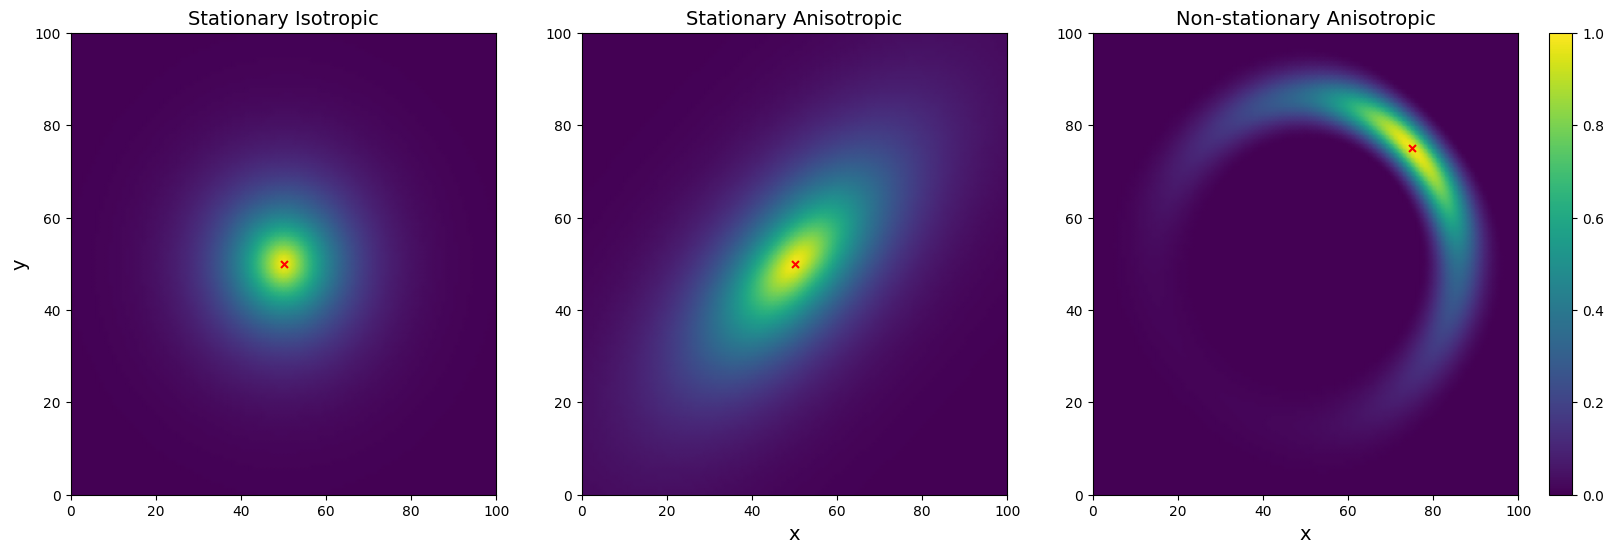

In [31]:
cmax = tmp2.max()
cmin = tmp2.min()
fig, ax = plt.subplots(figsize=(20, 6),ncols = 3)
im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp3,cmap = "viridis",shading = "gouraud",vmin = 0, vmax = 1)
im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp2,cmap = "viridis",shading = "gouraud",vmin = 0, vmax = 1)
im3 = ax[2].pcolormesh(mod.grid.x,mod.grid.y,tmp1,cmap = "viridis",shading = "gouraud",vmin = 0, vmax = 1)
ax[2].scatter(pos1[0],pos1[1],color = "red",s = 25,marker = "x")
ax[0].scatter(pos[0],pos[1],color = "red",s = 25,marker = "x")
ax[1].scatter(pos[0],pos[1],color = "red",s = 25,marker = "x")

fig.colorbar(im3, ax=ax, fraction=0.046, pad=0.02)
ax[0].set_ylabel('y', fontsize = 14)
ax[1].set_xlabel('x', fontsize = 14)
ax[2].set_xlabel('x', fontsize = 14)
ax[0].set_title('Stationary Isotropic', fontsize = 14)
ax[1].set_title('Stationary Anisotropic', fontsize = 14)
ax[2].set_title('Non-stationary Anisotropic', fontsize = 14)
# fig.savefig("../../../thesis/figures/spat_models.png",dpi = 200, bbox_inches = "tight")
plt.show()



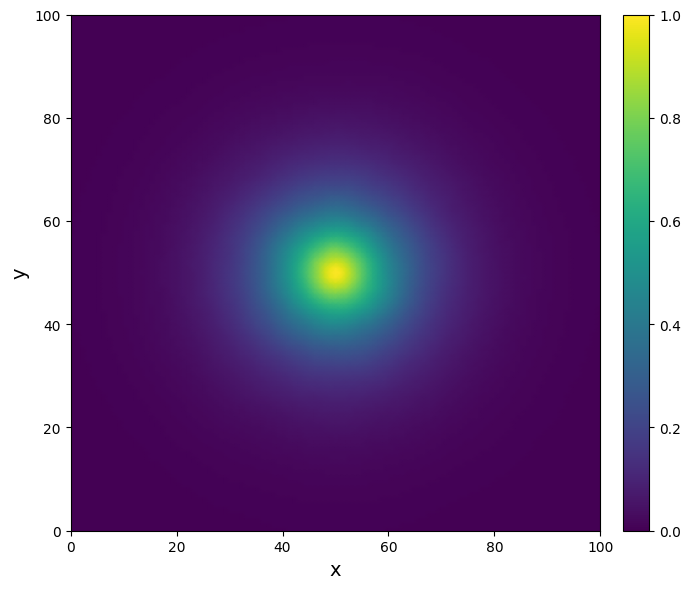

In [191]:



cmax = tmp2.max()
cmin = tmp2.min()
fig, ax = plt.subplots(figsize=(7, 6))
im = ax.pcolormesh(mod.grid.x,mod.grid.y,tmp2,cmap = "viridis",shading = "gouraud",vmin = 0, vmax = 1)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

ax.set_ylabel('y', fontsize = 14)
ax.set_xlabel('x', fontsize = 14)
fig.tight_layout()
# fig.savefig("../../../thesis/figures/spat_iso.png",dpi = 200, bbox_inches = "tight")
plt.show()



In [ ]:
# make a initial square as mean "mu" for the model
mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T)
for j in range(mod.grid.N):
    for i in range(mod.grid.M):
        if np.sqrt((j-mod.grid.N/4)**2 + (i-mod.grid.M*3/4)**2) < 10/h: 
            mu[j*mod.grid.M+i] = 1.0

mod.setModel() 
mod.update(y = mu[mu>0],idx = np.where(mu>0)[0],tau = 1000)

In [ ]:
mvar = mod.qinv(simple = True)
pos = [50,50]
ik = np.zeros(mod.grid.n)
k = mod.grid.getIdx(pos,extend = True)
ks = mod.grid.getIdx(pos,extend = False)
ik[k] = 1
cov = mod.grid.getS()@mod.Q_fac.solve_A(ik)
corr = cov/np.sqrt(mvar[ks]*mvar)
tmp2 = corr.reshape(mod.grid.M,mod.grid.M)

In [ ]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
tmp3 = (mod.grid.getS()@mod.mu).reshape(mod.grid.T,mod.grid.N,mod.grid.M)

In [6]:
tmp2.min()

3.5602659415756415e-06

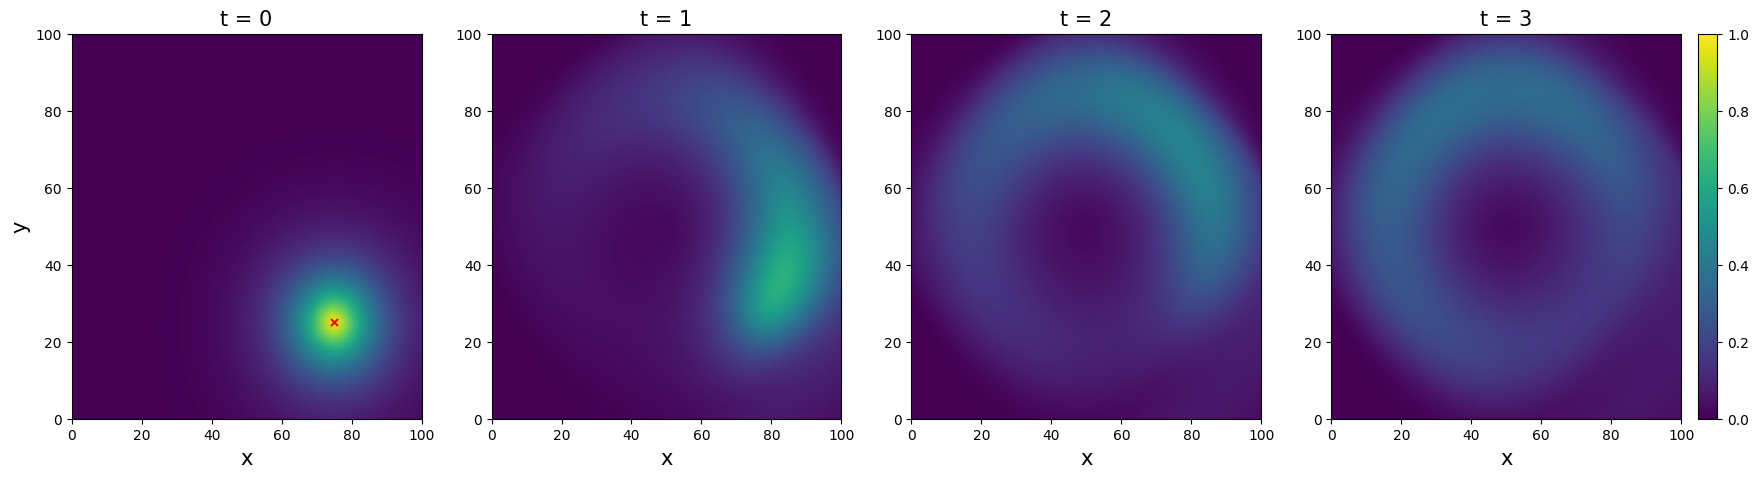

In [11]:
# cmax1 = tmp.max()
# cmin1 = tmp.min()
# cmax3 = tmp3.max()
# cmin3 = tmp3.min()
fig, ax = plt.subplots(figsize=(22, 5),ncols = 4)
im = []
im = []
for i in range(4):
    im.append(ax[i].pcolormesh(mod.grid.x,mod.grid.y,tmp2[i,:,:],cmap = "viridis",shading = "gouraud",vmin = 0, vmax = 1))
    if i == 3:
        fig.colorbar(im[i], ax=ax, fraction=0.046, pad=0.01)
    if i == 0:
        ax[i].set_ylabel('y', fontsize = 15)
        ax[i].scatter(pos[0],pos[1],color = "red",s = 25,marker = "x")
    ax[i].set_xlabel('x', fontsize = 15)
    ax[i].set_title('t = ' + str(i), fontsize = 15)
# plt.show()
fig.savefig("../../../thesis/figures/advection_diffusion.png",dpi = 200, bbox_inches = "tight")


In [ ]:
cmax1 = tmp.max()
cmin1 = tmp.min()
cmax3 = tmp3.max()
cmin3 = tmp3.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 12),nrows = 2)
    # im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin1, vmax = cmax1)
    im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp3[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin3, vmax = cmax3)
    fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[1].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].set_ylabel('y', fontsize = 15)
    ax[0].set_title('Conditional realization', fontsize = 15)
    ax[1].set_title('Conditional expectation', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("adv/var%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()

img = cv2.imread('adv/var00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./adv/var.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('adv/var%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [ ]:
# want to make this similar to my 3D plotting in GMRFpy
# using plotly, only now time downwards
import numpy as np
import spdepy as sp
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.io as pio

pio.orca.shutdown_server()
M = mod.grid.M
N = mod.grid.N
T = mod.grid.T
sx = mod.grid.sx
sy = mod.grid.sy
ts = mod.grid.t
value = tmp3.reshape(mod.grid.T,-1)
cmin = value.min()
cmax = value.max()
cs = "viridis"
xdif = mod.grid.A/4
ydif = mod.grid.B/4
xarrow = np.array([sx.max()-.497*xdif,sx.max()-.142*xdif,sx.max()-.142*xdif,sx.max()-.142*xdif,sx.max()-.355*xdif])
yarrow = np.array([sy.max()-.520*ydif,sy.max()-.164*ydif,sy.max()-.378*ydif,sy.max()-.164*ydif,sy.max() -.164*ydif])
vZ = np.array([0,0.705,1.67,3])
fig = go.Figure(data=[go.Isosurface(z=-0.5*np.ones(N*M), x=sx, y=sy,
                                    value=value[3,:],surface_count=1,
                                    isomin = cmin,isomax = cmax,colorscale=cs,
                                    colorbar=dict(thickness=20,lenmode = "fraction", 
                                                  len = 0.8, ticklen=10,
                                                  tickfont=dict(size=25, color='black')))])
for i in range(1,4):
    fig.add_trace(go.Isosurface(z=(-0.5 - vZ[i])*np.ones(N*M), x=sx+xdif*vZ[i], y=sy-ydif*vZ[i],
                                surface_count=1, value=value[3-i,:], isomin = cmin,
                                isomax =cmax,colorscale=cs,showscale = False))

if cmin == 0 and cmax == 1:
    fig.add_trace(go.Scatter3d(mode = "markers", x=[sx[pos[1]*M + pos[0]]+xdif*3],
                               y = [sy[pos[1]*M + pos[0]]-ydif*3], 
                               z=[-3.5], marker_color="black",marker_size=7,showlegend = False))

for j in range(4):
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, 0*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[0*M + 0, 0*M + (M-1)]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, (N-1)*M + 0]]+xdif*vZ[j],
                               y=[0,0]+sy[[0*M + 0, (N-1)*M + 0]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[(N-1)*M + 0, (N-1)*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[(N-1)*M + 0, (N-1)*M + (M-1)]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + (M-1), (N-1)*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[0*M + (M-1), (N-1)*M + (M-1)]]+-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))

# axis 
fig.add_trace(go.Scatter3d(x=[0,0.213*xdif,0.114*xdif,0.213*xdif,0.114*xdif]+sx[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]+xdif*3, 
                            y=[0,0,0.099*ydif,0,-0.099*ydif]+sy[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
                            line = dict(color='black', width = 5),showlegend=False))
fig.add_trace(go.Scatter3d(x=[0,0,0.099*xdif,0,-0.099*xdif]+sx[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+xdif*3, 
                            y=[0,0.213*ydif,0.114*ydif,0.213*ydif,0.114*ydif]+sy[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
                            line = dict(color='black',width = 5),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]+xdif*3, 
                            y=sy[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
                            marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+xdif*3,
                           y=sy[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3,
                           z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
                           marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[0*M + 2*(M-1)//4]]+xdif*3, 
                            y=sy[[0*M + 2*(M-1)//4]]-ydif*3, 
                            z=np.array([-0.5])-3, mode='text',textposition="bottom left",
                            text = ["x"],textfont=dict(size=18,color="black"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[2*(N-1)//4*M + (M-1)]]+xdif*3,
                           y=sy[[2*(N-1)//4*M + (M-1)]]+-ydif*3,
                           z=np.array([-0.5])-3, mode='text', textposition="bottom right",
                           text = ["y"],textfont=dict(size=18,color="black"),showlegend=False))
# lines
fig.add_trace(go.Scatter3d(
    x = np.array([xdif*3,-0.4*xdif,-0.3*xdif+xdif*0.099, -0.4*xdif,-0.3*xdif-xdif*0.099])+sx[0],
    y = np.array([-ydif*3,0.4*ydif,0.3*ydif + ydif*0.099, 0.4*ydif, 0.3*ydif-ydif*0.099])+sy[0],
    z = np.array([-3.5,-0.1,-0.2,-0.1,-0.2]),
    line=dict(color='black',width=7),
    mode='lines',
    showlegend=False))

# marker
fig.add_trace(go.Scatter3d(
    x = np.array([xdif]*4)*np.flip(vZ) + sx[0],
    y = np.array([-ydif]*4)*np.flip(vZ) + sy[0],
    z = np.array([-.5]*4) - np.flip(vZ),
    mode='markers',
    marker=dict(size=8, color="black",symbol = "cross"),
    showlegend=False))

# text
fig.add_trace(go.Scatter3d(
    x = np.array([xdif]*4)*np.flip(vZ) + sx[0],
    y = np.array([-ydif]*4)*np.flip(vZ) + sy[0],
    z = np.array([-.5]*4) - np.flip(vZ),
    mode='text',
    text=["%d"%i for i in range(4)],
    textfont=dict(size=18,color="black"),
    textposition="middle left",
    showlegend=False))
    
fig.add_trace(go.Scatter3d(
    x = np.array([-0.5*xdif])+sx[0],
    y = np.array([0.5*ydif])+sy[0],
    z = np.array([0.0]),
    mode='text',
    text=["Time"],
    textfont=dict(size=15,color="black"),
    textposition="middle center",
    showlegend=False))
    
# used for centering
fig.add_trace(go.Scatter3d(
    x = np.array([-0.5*xdif])+sx[-1],
    y = np.array([0.5*ydif])+sy[-1],
    z = [0.0],
    mode='text',
    text=[""],
    textfont=dict(size=15,color="black"),
    textposition="middle center",
    showlegend=False))
######

camera = dict(eye=dict(x=1.092, y=-1.12, z=.83), center=dict(x=0.13, y=-0.18, z=-0.042))
fig.update_scenes(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False, camera = camera)
fig.update_layout(autosize=False, width=650, height=1000, scene_aspectratio=dict(x=1, y=1, z=1.0))

fig.write_html("test.html", auto_open = True)
fig.write_image("../../../spat_temp_paper/figures/example_varadv.png",engine="orca",scale=1)
# vers = 1 7 


## B-spline viz

In [ ]:
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
from scipy import sparse
def delete_rows_csr(mat, indices):
    """
    Remove the rows denoted by ``indices`` form the CSR sparse matrix ``mat``.
    """
    if not isinstance(mat, sparse.csr_matrix):
        raise ValueError("works only for CSR format -- use .tocsr() first")
    indices = (indices)
    mask = np.ones(mat.shape[0], dtype=bool)
    mask[indices] = False
    return mat[mask]



from matplotlib import colors
from matplotlib import cm

mod = sp.model(grid = sp.grid(x= np.linspace(0,1.0,30), y = np.linspace(0,1.0,30)),
    spde = 'whittle-matern', ha = False, bc = 3, anisotropic = False)
# mod.grid.bs = (mod.grid.bs/mod.grid.bs.max(axis=0)[np.newaxis,:])
alphas = mod.grid.bs.reshape(mod.grid.M,mod.grid.N,mod.grid.bs.shape[1])

def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

cdictb = {
    'red': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.1,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(100),inter_from_256(100))),
    'green':  ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.1,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(0),inter_from_256(0))),
    'blue': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.1,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(256),inter_from_256(256)))
}

cdictr = {
    'red': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(256),inter_from_256(256))),
    'green':  ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(0),inter_from_256(0))),
    'blue': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(100),inter_from_256(100)))
}

cdictg = {
    'red': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(100),inter_from_256(100))),
    'green':  ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(256),inter_from_256(256))),
    'blue': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(100),inter_from_256(100)))
}


cmaps = [colors.LinearSegmentedColormap('red1',segmentdata=cdictr),colors.LinearSegmentedColormap('green1',segmentdata=cdictg),colors.LinearSegmentedColormap('blue1',segmentdata=cdictb),
         colors.LinearSegmentedColormap('green2',segmentdata=cdictg),colors.LinearSegmentedColormap('blue2',segmentdata=cdictb),colors.LinearSegmentedColormap('red2',segmentdata=cdictr),
         colors.LinearSegmentedColormap('blue3',segmentdata=cdictb),colors.LinearSegmentedColormap('red3',segmentdata=cdictr),colors.LinearSegmentedColormap('green3',segmentdata=cdictg)]

cmaps2 = ["r","g","b"]
fig,ax = plt.subplots(figsize = (7,7))
for i in range(mod.grid.bs.shape[1]):
       ax.imshow(mod.grid.bs[:,i].reshape(mod.grid.M,mod.grid.N), extent=[0, 1, 0, 1], origin='lower',alpha = alphas[:,:,i],interpolation="bilinear",cmap = cmaps[i])
       CS = ax.contour(mod.grid.x, mod.grid.y, mod.grid.bs[:,i].reshape(mod.grid.M,mod.grid.N),levels = [0.5,0.7,0.9],colors = cmaps2[(i%3 + i//3)%3],alpha = 0.7)
       ax.clabel(CS, inline=2, fontsize=12)

ax.set_xlabel("x",fontsize = 17)
ax.set_ylabel("y",fontsize = 17)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
fig.savefig("LuciaFigure",dpi = 200)

In [ ]:
import spdepy as sp
import numpy as np

import plotly.graph_objs as go
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.io as pio



mod = sp.model(grid = sp.grid(x= np.linspace(0,1.0,30), y = np.linspace(0,1.0,30)),
    spde = 'whittle-matern', ha = False, bc = 3, anisotropic = False)
mod.grid.bs = (mod.grid.bs/mod.grid.bs.max(axis=0)[np.newaxis,:])
alphas = mod.grid.bs.reshape(mod.grid.M,mod.grid.N,mod.grid.bs.shape[1])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = sx.reshape(mod.grid.M,mod.grid.N)
y = sy.reshape(mod.grid.M,mod.grid.N)
z = alphas
z = np.ma.masked_where(z <= 0.0, z)
my_col = cm.jet([((i%3) + (i//3))%3/3 for i in range(9)])
# Plot the surface
for i in range(9):
    ax.plot_surface(x, y, z[:,:,i], color = my_col[i],alpha = 0.8)

# Set an equal aspect ratio
ax.set_aspect('equal')
ax.view_init(60,30)

plt.show()

In [ ]:
?ax.view_init

In [ ]:
[((i%3) + (i//3))%3 for i in range(9)]

In [ ]:
pio.orca.shutdown_server()
M = mod.grid.M
N = mod.grid.N
sx = mod.grid.sx
sy = mod.grid.sy
value = alphas.reshape(mod.grid.N*mod.grid.M,-1)
cmin = 0
cmax = 2
cs = [(0.0, "rgb(256, 0, 0)"), (0.40, "rgb(256, 0, 0)"),
(0.40, "rgb(0, 256, 0)"), (0.80, "rgb(0, 256, 0)"),
(0.80, "rgb(0, 0, 256)"), (1.00, "rgb(0, 0, 256)")]
os = [(0.00,0.0), (0.005,0.0),
(0.005, 1.00), (1.00,1,00 )]
fig = go.Figure(data=[go.Surface(z=alphas[:,:,0],colorscale = cs,showscale=False,
                                 surfacecolor = np.ones(alphas[:,:,0].shape)*(alphas[:,:,0]>0)*(0)%3,
                                 cmin = cmin, cmax = cmax)])
for i in range(1,9):
    fig.add_trace(go.Surface(z=alphas[:,:,i],colorscale = cs,showscale=False,
                                    surfacecolor = np.ones(alphas[:,:,i].shape)*(alphas[:,:,i]>0)*((i%3)+i//3)%3,
                                    cmin = cmin, cmax = cmax))

# for i in range(1,4):
#     fig.add_trace(go.Isosurface(z=(-0.5 - vZ[i])*np.ones(N*M), x=sx+xdif*vZ[i], y=sy-ydif*vZ[i],
#                                 surface_count=1, value=value[3-i,:], isomin = cmin,
#                                 isomax =cmax,colorscale=cs,showscale = False))
camera = dict(eye=dict(x=1.5, y=-1.5, z=1.0), center=dict(x=0., y=-0., z=-0.0))
fig.update_scenes(xaxis_visible=True, yaxis_visible=True, zaxis_visible=True, camera = camera)
fig.update_layout(autosize=False, width=1000, height=1000, scene_aspectratio=dict(x=1, y=1, z=.6))

fig.write_html("test.html", auto_open = True)
# fig.write_image("../../../spat_temp_paper/figures/example_varadv.png",engine="orca",scale=1)

In [ ]:
# # want to make this similar to my 3D plotting in GMRFpy
# # using plotly, only now time downwards
# import numpy as np
# import spdepy as sp
# import plotly.graph_objs as go
# from plotly.offline import plot
# from plotly.subplots import make_subplots
# import plotly.io as pio

# pio.orca.shutdown_server()
# M = mod.grid.M
# N = mod.grid.N
# T = mod.grid.T
# sx = mod.grid.sx
# sy = mod.grid.sy
# ts = mod.grid.t
# value = mvar.reshape(T,-1)
# cmin = value.min()
# cmax = value.max()
# cs = "viridis"
# xarrow = np.array([sx.max()-175,sx.max()-50,sx.max()-50,sx.max()-50,sx.max()-125])
# yarrow = np.array([sy.max()-183,sy.max()-58,sy.max()-133,sy.max()-58,sy.max() -58])
# xdif = mod.grid.A/4
# ydif = mod.grid.B/4
# fig = go.Figure(data=[go.Isosurface(z=-0.5*np.ones(N*M), x=sx, y=sy,
#                                     value=value[9,:],surface_count=1,
#                                     isomin = cmin,isomax = cmax,colorscale=cs,
#                                     colorbar=dict(thickness=20,lenmode = "fraction", 
#                                                   len = 0.8, ticklen=10,
#                                                   tickfont=dict(size=25, color='black')))])
# fig.add_trace(go.Isosurface(z=-1.5*np.ones(N*M), x=sx+xdif*1, y=sy-ydif*1,
#                             surface_count=1, value=value[6,:], isomin = cmin,
#                             isomax =cmax,colorscale=cs,showscale = False))
# fig.add_trace(go.Isosurface(z=-2.5*np.ones(N*M), x=sx+xdif*2, y=sy-ydif*2,
#                             surface_count=1, value=value[3,:], isomin = cmin,
#                             isomax =cmax,colorscale=cs,showscale = False))
# fig.add_trace(go.Isosurface(z=-3.5*np.ones(N*M), x=sx+xdif*3, y=sy-ydif*3,
#                             surface_count=1, value=value[0,:], isomin = cmin,
#                             isomax =cmax,colorscale=cs,showscale = False))

# # if pos is not None:
# #     fig.add_trace(go.Scatter3d(mode = "markers", x=[sx[pos[1]*M + pos[0]]+xdif*3],
# #                                y = [sy[pos[1]*M + pos[0]]-ydif*3], 
# #                                z=[-3.5], marker_color="black",marker_size=7,showlegend = False))

# # fig.add_trace(go.Scatter3d(x=[0,0,xdif,xdif*2,xdif*3]+sx[0]-90, 
# #                            y=[0,0,-ydif,-ydif*2,-ydif*3]+sy[0]-90, 
# #                            z=[0,-0.5,-1.5,-2.5,-3.5], mode='text',
# #                            text = ["Time:",str(int(ts[9])),str(int(ts[6])),str(int(ts[3])),str(int(ts[0]))],
# #                            textfont=dict(size=25,color="black"),showlegend=False))
# for j in range(4):
#     fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, 0*M + (M-1)]]+xdif*j, 
#                                y=[0,0]+sy[[0*M + 0, 0*M + (M-1)]]-ydif*j, 
#                                z=np.array([-0.5,-0.5])-j, mode='lines',
#                                line = dict(color='black'),showlegend=False))
#     fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, (N-1)*M + 0]]+xdif*j,
#                                y=[0,0]+sy[[0*M + 0, (N-1)*M + 0]]-ydif*j, 
#                                z=np.array([-0.5,-0.5])-j, mode='lines',
#                                line = dict(color='black'),showlegend=False))
#     fig.add_trace(go.Scatter3d(x=[0,0]+sx[[(N-1)*M + 0, (N-1)*M + (M-1)]]+xdif*j, 
#                                y=[0,0]+sy[[(N-1)*M + 0, (N-1)*M + (M-1)]]-ydif*j, 
#                                z=np.array([-0.5,-0.5])-j, mode='lines',
#                                line = dict(color='black'),showlegend=False))
#     fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + (M-1), (N-1)*M + (M-1)]]+xdif*j, 
#                                y=[0,0]+sy[[0*M + (M-1), (N-1)*M + (M-1)]]+-ydif*j, 
#                                z=np.array([-0.5,-0.5])-j, mode='lines',
#                                line = dict(color='black'),showlegend=False))

# # axis 
# fig.add_trace(go.Scatter3d(x=[0,75,40,75,40]+sx[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]+xdif*3, 
#                             y=[0,0,35,0,-35]+sy[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]-ydif*3, 
#                             z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
#                             line = dict(color='black', width = 5),showlegend=False))
# fig.add_trace(go.Scatter3d(x=[0,0,35,0,-35]+sx[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+xdif*3, 
#                             y=[0,75,40,75,40]+sy[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3, 
#                             z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
#                             line = dict(color='black',width = 5),showlegend=False))
# fig.add_trace(go.Scatter3d(x=sx[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]+xdif*3, 
#                             y=sy[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]-ydif*3, 
#                             z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
#                             marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
# fig.add_trace(go.Scatter3d(x=sx[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+xdif*3,
#                            y=sy[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3,
#                            z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
#                            marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
# fig.add_trace(go.Scatter3d(x=sx[[0*M + 2*(M-1)//4]]+xdif*3, 
#                             y=sy[[0*M + 2*(M-1)//4]]-ydif*3, 
#                             z=np.array([-0.5])-3, mode='text',textposition="bottom left",
#                             text = ["x"],textfont=dict(size=18,color="black"),showlegend=False))
# fig.add_trace(go.Scatter3d(x=sx[[2*(N-1)//4*M + (M-1)]]+xdif*3,
#                            y=sy[[2*(N-1)//4*M + (M-1)]]+-ydif*3,
#                            z=np.array([-0.5])-3, mode='text', textposition="bottom right",
#                            text = ["y"],textfont=dict(size=18,color="black"),showlegend=False))
# # lines
# fig.add_trace(go.Scatter3d(
#     x = np.array([xdif*3,-0.4*xdif,-0.3*xdif+35,-0.4*xdif,-0.3*xdif-35])+sx[0],
#     y = np.array([-ydif*3,0.4*ydif,0.3*ydif+35,0.4*ydif,0.3*ydif-35])+sy[0],
#     z = np.array([-3.5,-0.1,-0.2,-0.1,-0.2]),
#     line=dict(color='black',width=7),
#     mode='lines',
#     showlegend=False))

# # marker
# fig.add_trace(go.Scatter3d(
#     x = np.array([xdif*3,xdif*2,xdif*1,0])+sx[0],
#     y = np.array([-ydif*3,-ydif*2,-ydif,0])+sy[0],
#     z = np.array([-3.5,-2.5,-1.5,-0.5]),
#     mode='markers',
#     marker=dict(size=8, color="black",symbol = "cross"),
#     showlegend=False))

# # text
# fig.add_trace(go.Scatter3d(
#     x = np.array([xdif*3,xdif*2,xdif*1,0])+sx[0],
#     y = np.array([-ydif*3,-ydif*2,-ydif,0])+sy[0],
#     z = np.array([-3.5,-2.5,-1.5,-0.5]),
#     mode='text',
#     text=[str(int(ts[0])),str(int(ts[3])),str(int(ts[6])),str(int(ts[9]))],
#     textfont=dict(size=18,color="black"),
#     textposition="middle left",
#     showlegend=False))
    
# fig.add_trace(go.Scatter3d(
#     x = np.array([-0.5*xdif])+sx[0],
#     y = np.array([0.5*ydif])+sy[0],
#     z = np.array([0.0]),
#     mode='text',
#     text=["Time (min)"],
#     textfont=dict(size=15,color="black"),
#     textposition="middle center",
#     showlegend=False))
    
# # used for centering
# fig.add_trace(go.Scatter3d(
#     x = np.array([-0.5*xdif])+sx[-1],
#     y = np.array([0.5*ydif])+sy[-1],
#     z = [0.0],
#     mode='text',
#     text=[""],
#     textfont=dict(size=15,color="black"),
#     textposition="middle center",
#     showlegend=False))
# ######

# fig.add_trace(go.Scatter3d(
#     x=xarrow, 
#     y=yarrow,
#     z=np.array([0,0,0,0,0])-0.5,
#     line=dict(color='white',width=12),
#     mode='lines+text',
#     text=["","", "N","",""],
#     showlegend=False,
#     textposition="top center",
#     textfont=dict(size=25,color="black")))

# camera = dict(eye=dict(x=.97, y=-.97, z=1.2), center=dict(x=0.15, y=-0.18, z=0.05))
# fig.update_scenes(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False, camera = camera)
# fig.update_layout(autosize=False, width=650, height=1000, scene_aspectratio=dict(x=1, y=1, z=1.0))

# fig.write_html("test.html", auto_open = True)
# # fig.write_image("../../../spat_temp_paper/figures/app_vAvD_mvar.png",engine="orca",scale=1)



## Temporal autocorrelation function

In [22]:
import spdepy as sp
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt



In [23]:
data = sp.datasets.get_sinmod_training()

In [45]:
autocorrelations = np.zeros((data["data"].shape[0],21))
for i in range(data["data"].shape[0]):
    autocorrelations[i,:] = sm.tsa.acf(data["data"][i,:],nlags = 20)

In [77]:
autocorrelations.shape

(2250, 21)

In [209]:
sm.tsa.acf(data["mut"].reshape(-1,9,9)[0,:,0],nlags=20)

array([ 1.        ,  0.3774756 ,  0.09364527,  0.03938124, -0.00719989,
       -0.09201517, -0.24573293, -0.32607297, -0.33948115])

In [207]:
data["mut"].reshape(-1,9,9).shape

(2500, 9, 9)

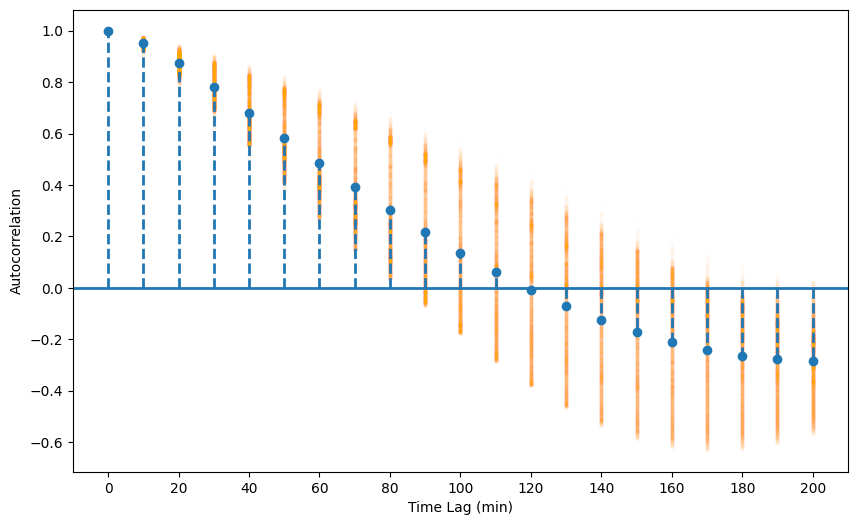

In [61]:
def plot_acf_like(autocorrelations):
    """Plot the averaged autocorrelation function as a bar plot similar to plot_acf."""
    # Compute the averaged autocorrelation over all locations
    avg_autocorrelation = np.mean(autocorrelations, axis=0)
    time_lags = np.arange(len(avg_autocorrelation))
    
    # Number of time points and calculate approximate confidence intervals (optional)
    n_obs = autocorrelations.shape[-1]

    # Plot ACF-like bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    for i in range(autocorrelations.shape[0]):
        ax.plot(time_lags*10, autocorrelations[i,:], 'o', alpha = 0.01, color = "orange", markersize = 2)
    ax.vlines(time_lags*10, 0, avg_autocorrelation, lw=2, linestyles='--')
    ax.plot(time_lags*10, avg_autocorrelation,'o')
    ax.axhline(y=0, linewidth=2)
    ax.set_xlabel('Time Lag (min)')
    ax.set_ylabel('Autocorrelation')
    ax.xaxis.set_ticks(np.arange(0,21,2)*10)
    plt.show(fig)
    fig.savefig("temporal_acf.png",dpi = 200)

plot_acf_like(autocorrelations)

## Add more bsplines knots

In [159]:
x = np.linspace(0,1,101)
y = np.linspace(0,1,101)
hx = x[1] - x[0]
hy = y[1] - y[0]
sx, sy = np.meshgrid(x,y)
sx = sx.flatten()
sy = sy.flatten()
Nbs=5

In [161]:

def basis(dx = 0 , dy = 0, d = 2):
    tx = sx+dx
    ty = sy+dy
    xmin = sx.min()
    xmax = sx.max()
    ymin = sy.min()
    ymax = sy.max()

    kx = np.linspace(xmin - 2*(xmax-xmin)/Nbs, xmax + 2*(xmax-xmin)/Nbs,Nbs+5)
    ky = np.linspace(ymin - 2*(ymax-ymin)/Nbs, ymax + 2*(ymax-ymin)/Nbs,Nbs+5)
    Bx = list([np.stack([((tx >= kx[i])&(tx < kx[i+1]) | ((tx >= kx[i])&(tx <= kx[i+1])&(i==(kx.size-2))))*1.0 for i in range(kx.size-1)],axis=1)])
    By = list([np.stack([((ty >= ky[i])&(ty < ky[i+1]) | ((ty >= ky[i])&(ty <= ky[i+1])&(i==(ky.size-2))))*1.0 for i in range(ky.size-1)],axis=1)])
    for r in range(1,d+1):
        Bx.append(np.zeros((tx.shape[0],kx.size-r-1)))
        By.append(np.zeros((ty.shape[0],ky.size-r-1)))
        for i in range(kx.size-r-1):
            Bx[r][:,i] = (tx - kx[i])/(kx[i+r]-kx[i])*Bx[r-1][:,i] + (kx[i+r+1] - tx)/(kx[i+r+1]-kx[i+1])*Bx[r-1][:,i+1]
            By[r][:,i] = (ty - ky[i])/(ky[i+r]-ky[i])*By[r-1][:,i] + (ky[i+r+1] - ty)/(ky[i+r+1]-ky[i+1])*By[r-1][:,i+1]
    bx = np.hstack([(Bx[2][:,0] + Bx[2][:,1]).reshape(-1,1), Bx[2][:,2:-2], (Bx[2][:,-2] + Bx[2][:,-1]).reshape(-1,1)])
    by = np.hstack([(By[2][:,0] + By[2][:,1]).reshape(-1,1), By[2][:,2:-2], (By[2][:,-2] + By[2][:,-1]).reshape(-1,1)])
    return(bx,by)

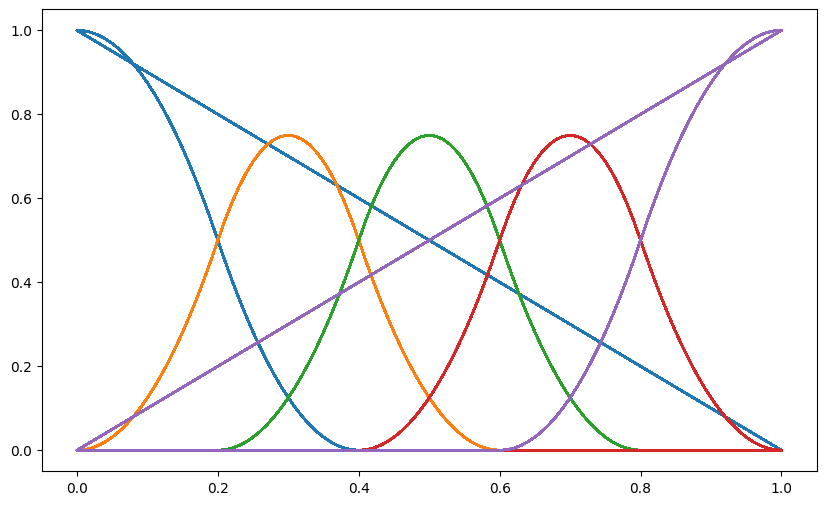

In [162]:
tmp = basis()
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(Nbs):
    ax.plot(sx,tmp[0][:,i],label = "Basis %d"%i)


In [164]:


def basisN():
    bx, by = basis()
    bs = np.zeros((sx.shape[0],Nbs*Nbs))
    for i in range(Nbs):
        for j in range(Nbs):
                bs[:,i*Nbs+j] = bx[:,j]*by[:,i]
    return(bs)


def basisH():
    bxA = np.zeros((sx.shape[0],4,Nbs))
    byA = np.zeros((sy.shape[0],4,Nbs))
    bs = np.zeros((sx.shape[0],4,Nbs*Nbs))
    for i in range(4):
        if (i == 0):
            bx,by = basis(dx=-1/2*hx)
        elif (i == 1):
            bx,by = basis(dx=1/2*hx)
        elif (i == 2):
            bx,by = basis(dy=-1/2*hy)
        elif (i == 3):
            bx,by = basis(dy=1/2*hy)
        bxA[:,i,:] = bx
        byA[:,i,:] = by
    for i in range(Nbs):
        for j in range(Nbs):
                bs[:,:,i*Nbs+j] = bxA[:,:,j]*byA[:,:,i]
    return(bs)
        
def basisA():
    bxA = np.zeros((sx.shape[0],4,Nbs))
    byA = np.zeros((sy.shape[0],4,Nbs))
    bs = np.zeros((sx.shape[0],4,Nbs*Nbs))
    for i in range(4):
        if (i == 2):
            bx,by = basis(dx=-1/2*hx)
        elif (i == 0):
            bx,by = basis(dx=1/2*hx)
        elif (i == 3):
            bx,by = basis(dy=-1/2*hy)
        elif (i == 1):
            bx,by = basis(dy=1/2*hy)
        bxA[:,i,:] = bx
        byA[:,i,:] = by
    for i in range(Nbs):
        for j in range(Nbs):
                bs[:,:,i*Nbs+j] = bxA[:,:,j]*byA[:,:,i]
    return(bs)

In [179]:
bs = basisH()

In [180]:
bs.shape

(10201, 4, 25)

In [181]:
bs = bs[:,0,:]

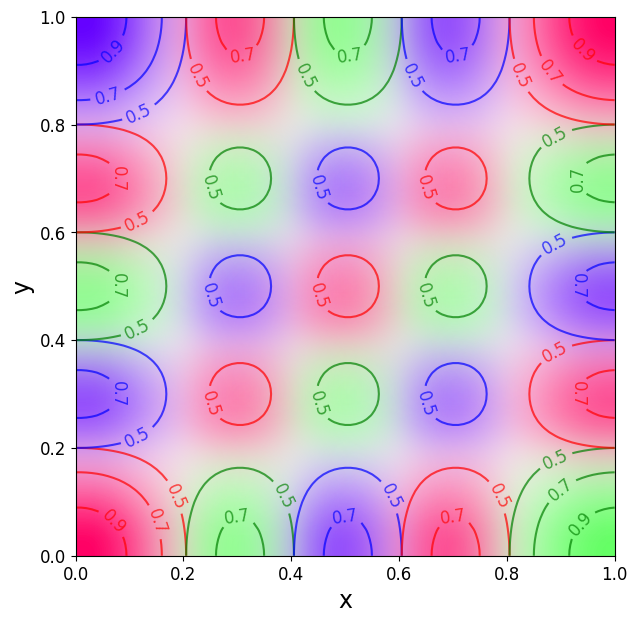

In [182]:

import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
M = x.shape[0]
N = y.shape[0]
alphas = bs.reshape(M,N,bs.shape[1])

def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

cdictb = {
    'red': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.1,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(100),inter_from_256(100))),
    'green':  ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.1,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(0),inter_from_256(0))),
    'blue': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.1,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(256),inter_from_256(256)))
}

cdictr = {
    'red': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(256),inter_from_256(256))),
    'green':  ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(0),inter_from_256(0))),
    'blue': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(100),inter_from_256(100)))
}

cdictg = {
    'red': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(100),inter_from_256(100))),
    'green':  ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(256),inter_from_256(256))),
    'blue': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.0,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(100),inter_from_256(100)))
}


cmaps = [colors.LinearSegmentedColormap('red1',segmentdata=cdictr),colors.LinearSegmentedColormap('green1',segmentdata=cdictg),colors.LinearSegmentedColormap('blue1',segmentdata=cdictb),colors.LinearSegmentedColormap('red2',segmentdata=cdictr),colors.LinearSegmentedColormap('green2',segmentdata=cdictg),
         colors.LinearSegmentedColormap('blue2',segmentdata=cdictb),colors.LinearSegmentedColormap('red3',segmentdata=cdictr),colors.LinearSegmentedColormap('green3',segmentdata=cdictg),colors.LinearSegmentedColormap('blue3',segmentdata=cdictb),colors.LinearSegmentedColormap('red4',segmentdata=cdictr),
         colors.LinearSegmentedColormap('green4',segmentdata=cdictg), colors.LinearSegmentedColormap('blue4',segmentdata=cdictb),colors.LinearSegmentedColormap('red5',segmentdata=cdictr),colors.LinearSegmentedColormap('green5',segmentdata=cdictg),colors.LinearSegmentedColormap('blue5',segmentdata=cdictb),
         colors.LinearSegmentedColormap('red6',segmentdata=cdictr),colors.LinearSegmentedColormap('green6',segmentdata=cdictg),colors.LinearSegmentedColormap('blue6',segmentdata=cdictb),colors.LinearSegmentedColormap('red7',segmentdata=cdictr),colors.LinearSegmentedColormap('green7',segmentdata=cdictg),
         colors.LinearSegmentedColormap('blue7',segmentdata=cdictb),colors.LinearSegmentedColormap('red8',segmentdata=cdictr),colors.LinearSegmentedColormap('green8',segmentdata=cdictg),colors.LinearSegmentedColormap('blue8',segmentdata=cdictb),colors.LinearSegmentedColormap('red9',segmentdata=cdictr),
]

cmaps2 = ["r","g","b","r","g",
          "b","r","g","b","r",
          "g","b","r","g","b",
          "r","g","b","r","g",
          "b","r","g","b","r",
]
fig,ax = plt.subplots(figsize = (7,7))
for i in range(bs.shape[1]):
       ax.imshow(bs[:,i].reshape(M,N), extent=[0, 1, 0, 1], origin='lower',alpha = alphas[:,:,i],interpolation="bilinear",cmap = cmaps[i])
       CS = ax.contour(x, y, bs[:,i].reshape(M,N),levels = [0.5,0.7,0.9],colors = cmaps2[i],alpha = 0.7)
       ax.clabel(CS, inline=2, fontsize=12)

ax.set_xlabel("x",fontsize = 17)
ax.set_ylabel("y",fontsize = 17)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()
# fig.savefig("LuciaFigure",dpi = 200)

# New

In [7]:

import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt

In [13]:
res_vAvD = np.load("fits/pred_var-advection-var-diffusion-2D-bc1.npy")
res_B10 = np.load("fits/pred_b10_var-advection-var-diffusion-2D-bc1.npy")
res_Bs5 = np.load("fits/pred_bs5_var-advection-var-diffusion-2D-bc1.npy")
res_C = np.load("fits/pred_seperable-spatial-temporal-ani-2D-bc1.npy")
val = sp.datasets.get_sinmod_validation()

In [14]:
mu_vAvD = res_vAvD.mean(axis = (0))
mu_vAvD[:,:,0] = np.sqrt(mu_vAvD[:,:,0])
sd_vAvD = (mu_vAvD).std(axis = (1))
mu_vAvD = mu_vAvD.mean(axis = (1))
mu_B10 = res_B10.mean(axis = (0))
mu_B10[:,:,0] = np.sqrt(mu_B10[:,:,0])
sd_B10 = (mu_B10).std(axis = (1))
mu_B10 = mu_B10.mean(axis = (1))
mu_Bs5 = res_Bs5.mean(axis = (0))
mu_Bs5[:,:,0] = np.sqrt(mu_Bs5[:,:,0])
sd_Bs5 = (mu_Bs5).std(axis = (1))
mu_Bs5 = mu_Bs5.mean(axis = (1))
mu_C = res_C.mean(axis = (0))
mu_C[:,:,0] = np.sqrt(mu_C[:,:,0])
sd_C = (mu_C).std(axis = (1))
mu_C = mu_C.mean(axis = (1))

Text(0, 0.5, 'RMSE')

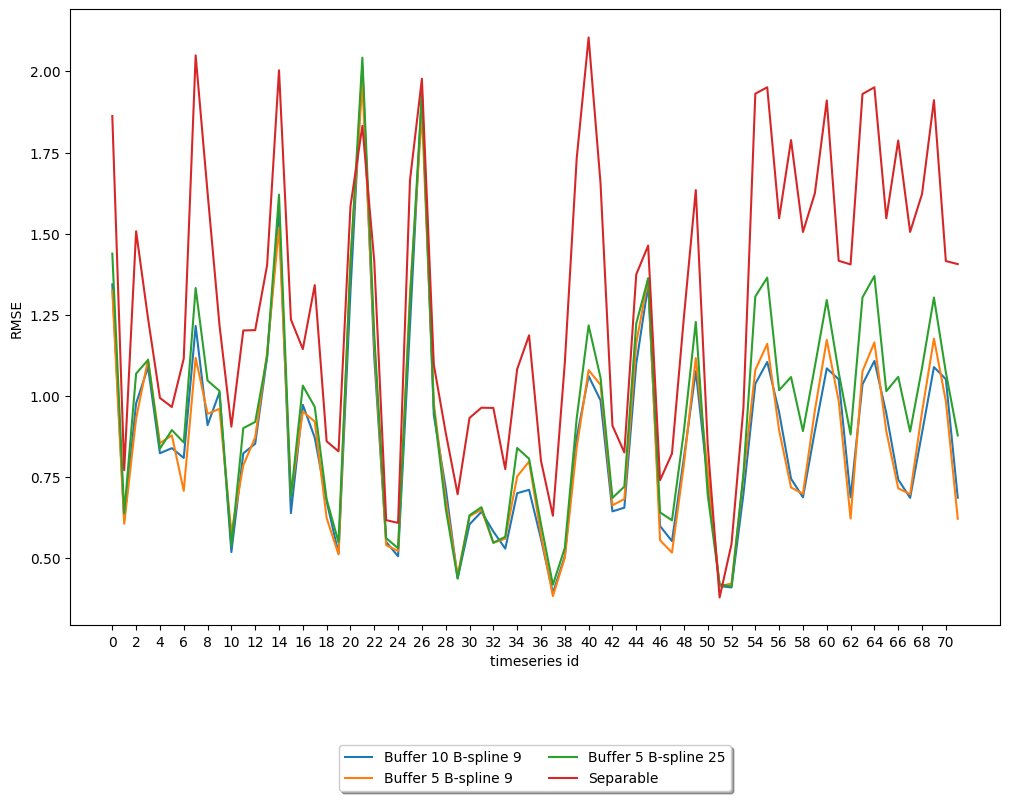

In [16]:
low_vAvD = np.max(np.stack([mu_vAvD - sd_vAvD, np.zeros(mu_vAvD.shape)], axis = 2), axis = 2)
low_B10 = np.max(np.stack([mu_B10 - sd_B10, np.zeros(mu_B10.shape)], axis = 2), axis = 2)
low_Bs5 = np.max(np.stack([mu_Bs5 - sd_Bs5, np.zeros(mu_Bs5.shape)], axis = 2), axis = 2)
fig, ax = plt.subplots(figsize=(12,8))
ns = 72 
stm = np.arange(ns).astype("int32")
ax.plot(stm,mu_B10[:,0][:ns], label = 'Buffer 10 B-spline 9')
# ax.fill_between(stm, low_B10[:,0][:ns], (mu_B10[:,0] + sd_B10[:,0])[:ns], alpha = 0.2)

ax.plot(stm,mu_vAvD[:,0][:ns], label = 'Buffer 5 B-spline 9') 
# ax.fill_between(stm, low_vAvD[:,0][:ns], (mu_vAvD[:,0] + sd_vAvD[:,0])[:ns], alpha = 0.2)

ax.plot(stm,mu_Bs5[:,0][:ns], label = 'Buffer 5 B-spline 25')
# ax.fill_between(stm, low_Bs5[:,0][:ns], (mu_Bs5[:,0] + sd_Bs5[:,0])[:ns], alpha = 0.2)

ax.plot(stm,mu_C[:,0][:ns], label = 'Separable')
ax.set_xticks(stm[::2])

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.28),
       fancybox=True, shadow=True, ncol=2)
ax.set_xlabel('timeseries id')
ax.set_ylabel('RMSE')

# fig.savefig("",bbox_inches='tight',dpi = 200)

In [17]:
mu_vAvD = res_vAvD.mean(axis = (0,1))
mu_vAvD[:,0] = np.sqrt(mu_vAvD[:,0])
sd_vAvD = (mu_vAvD).std(axis = (0))
mu_vAvD = mu_vAvD.mean(axis = (0))
mu_B10 = res_B10.mean(axis = (0,1))
mu_B10[:,0] = np.sqrt(mu_B10[:,0])
sd_B10 = (mu_B10).std(axis = (0))
mu_B10 = mu_B10.mean(axis = (0))
mu_Bs5 = res_Bs5.mean(axis = (0,1))
mu_Bs5[:,0] = np.sqrt(mu_Bs5[:,0])
sd_Bs5 = (mu_Bs5).std(axis = (0))
mu_Bs5 = mu_Bs5.mean(axis = (0))
mu_C = res_C.mean(axis = (0,1))
mu_C[:,0] = np.sqrt(mu_C[:,0])
sd_C = (mu_C).std(axis = (0))
mu_C = mu_C.mean(axis = (0))

In [18]:
print(mu_vAvD[0],sd_vAvD[0])
print(mu_B10[0],sd_B10[0])
print(mu_Bs5[0],sd_Bs5[0])
print(mu_C[0],sd_C[0])


0.9466651052164469 0.11436264201212828
0.939613137479252 0.11260127610223884
1.025718393012462 0.11679399144551472
1.3758468397745438 0.043211965064755685
